<a href="https://colab.research.google.com/github/vatsaaa/mtech/blob/main/semester_1/03_assignments/ml/Group21_Financial_Transactions_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group members
<table width="100%">
  <tr>
    <th width="25%">Name</th>
    <th width="40%">Email</th>
    <th width="20%">Student ID</th>
    <th width="15%">Contribution</th>
  </tr>
  <tr>
    <td>G. Ankur Vatsa</td>
    <td>2023aa05727@wilp.bits-pilani.ac.in</td>
    <td>2023aa05727</td>
    <td>40</td>
  </tr>
  <tr>
    <td>Radhika Joshi</td>
    <td>2023aa05976@wilp.bits-pilani.ac.in</td>
    <td>2023aa05976</td>
    <td>30</td>
  </tr>
  <tr>
    <td>Rajesh Tiwary</td>
    <td>2023aa05036@wilp.bits-pilani.ac.in</td>
    <td>2023aa05036</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Randhawane Santosh Baban</td>
    <td>2023aa05828@wilp.bits-pilani.ac.in</td>
    <td>2023aa05828</td>
    <td>30</td>
  </tr>
</table>

# Assignment Part 1

## Problem Statement

Financial institutions face the constant challenge of detecting fraudulent transactions amidst legitimate ones. Early identification and prevention of such fraudulent activities are crucial for minimizing financial losses and protecting customer trust. The objective is to develop a mathematical model to identify risky transactions using the available features of the **[Financial Transactions Dataset](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1-Rtizhn5EaLei3N3TOvqg4F74PTxtrjc%2Fview%3Fusp%3Dsharing)**.

## Solution

### Import Libraries and Dataset

<table width="100%" align="center">
  <tr>
    <th width="5%"></th>
    <th>Task</th>
    <th width="10%">Status</th>
  </tr>
  <tr>
    <td width="5%">1</td>
    <td>Download the dataset</td>
    <td width="10%"><input type="checkbox" onclick="return false" checked="true"/></td>
  </tr>
  <tr>
    <td width="5%">2</td>
    <td>Import the required libraries</td>
    <td width="10%"><input type="checkbox" onclick="return false"  checked="true"/></td>
  </tr>
</table>

In [87]:
# @title Ensure required libraries are installed
!pip install -q pandas pyfiglet imblearn matplotlib numpy seaborn tabulate

In [88]:
# @title Supported runtime: Google Colab
import pyfiglet as pf
from google.colab import runtime

code_str = None
in_colab = pf.figlet_format("Code  running  in  Google  Colab")
not_in_colab = pf.figlet_format("Please run in Google  Colab runtime only!!")

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    print(in_colab)
else:
    print(not_in_colab)
    runtime.unassign()


  ____          _                                _                _        
 / ___|___   __| | ___    _ __ _   _ _ __  _ __ (_)_ __   __ _   (_)_ __   
| |   / _ \ / _` |/ _ \  | '__| | | | '_ \| '_ \| | '_ \ / _` |  | | '_ \  
| |__| (_) | (_| |  __/  | |  | |_| | | | | | | | | | | | (_| |  | | | | | 
 \____\___/ \__,_|\___|  |_|   \__,_|_| |_|_| |_|_|_| |_|\__, |  |_|_| |_| 
                                                         |___/             
  ____                   _          ____      _       _     
 / ___| ___   ___   __ _| | ___    / ___|___ | | __ _| |__  
| |  _ / _ \ / _ \ / _` | |/ _ \  | |   / _ \| |/ _` | '_ \ 
| |_| | (_) | (_) | (_| | |  __/  | |__| (_) | | (_| | |_) |
 \____|\___/ \___/ \__, |_|\___|   \____\___/|_|\__,_|_.__/ 
                   |___/                                    



In [145]:
import os, pprint
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy.stats import skew
import seaborn as sns
from tabulate import tabulate

from sklearn.exceptions import UndefinedMetricWarning
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UndefinedMetricWarning)
    warnings.simplefilter(action='ignore', category=FutureWarning)

In [90]:
from google.colab import drive
%load_ext google.colab.data_table

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [91]:
# index_col = 0 avoids creation of "Unnamed column"
filename = input("Enter fully qualified file location for an accessible file:")
if not filename:
  filename = '/content/drive/MyDrive/ColabNotebooks/ML/data/Group21_Financial_Transactions_Dataset.csv'

df = pd.read_csv(filename, index_col = 0, encoding='utf-8')
df.sort_values(by=["Date", "Time of Day"], ascending = True, inplace = True)

Enter fully qualified file location for an accessible file:


In [92]:
# @title Generic Functions
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import f_classif, mutual_info_regression, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import platform, time

# @title Decorator for measuring performance
if platform.system() == "Windows":
    import psutil
elif platform.system() == "Darwin" or platform.system() == "Linux":
    import resource

if platform.system() == "Windows":
    def track_time_and_space(func):
        def wrapper(*args, **kwargs):
            start_time = time.time()
            start_memory = psutil.Process().memory_info().rss

            result = func(*args, **kwargs)

            end_time = time.time()
            end_memory = psutil.Process().memory_info().rss

            print(platform.system(), start_memory, end_memory)

            execution_time = end_time - start_time
            memory_usage = (end_memory - start_memory) / 1024  # Convert to kilobytes

            print(f"Execution time: {execution_time} seconds | Memory usage: {memory_usage} KB")

            return result, execution_time, memory_usage

        return wrapper
else:
    def track_time_and_space(func):
        def wrapper(*args, **kwargs):
            start_time = time.time()
            start_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

            result = func(*args, **kwargs)

            end_time = time.time()
            end_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

            execution_time = end_time - start_time
            memory_usage = (end_memory - start_memory) / 1024  # Convert to kilobytes

            print(f"Execution time: {execution_time} seconds | Memory usage: {memory_usage} KB")

            return result, execution_time, memory_usage

        return wrapper

def plot_class_distribution(y: pd.Series):
    plt.figure(figsize=(8, 6))
    sns.set_theme(style="whitegrid")
    sns.countplot(x=y, palette='viridis', hue=y, legend=False)
    plt.title('Class Distribution')
    plt.xlabel('Is Fraudulent')
    plt.ylabel('Count')
    plt.show()

def encode_categorical_features(X: pd.DataFrame) -> pd.DataFrame:
    # Encode categorical features so that they can be used in the SMOTE algorithm
    categorical_features = X.select_dtypes(include=['object']).columns
    for feature in categorical_features:
        encoder = LabelEncoder()
        X[feature] = encoder.fit_transform(X[feature])

    return X

def check_class_imbalance(df: pd.DataFrame, display_percent=True, display_count=True):
    # Separate features (X) from target variable (y)
    df['Is Fraudulent'] = df['Is Fraudulent'].map({0: 'No', 1: 'Yes'})
    X = df.drop("Is Fraudulent", axis=1)
    y = df["Is Fraudulent"]

    X = encode_categorical_features(X)

    plot_class_distribution(y)

    # Display the class distribution percentages
    if display_count:
        print("Class Distribution:")
        print(df['Is Fraudulent'].value_counts())

    if display_percent:
        print("\nClass Distribution Percentages:")
        print(df['Is Fraudulent'].value_counts(normalize=True) * 100)

    # Convert the target variable back to numeric
    y = y.map({'No': 0, 'Yes': 1})

    # Merge the features and target variable back into a single dataframe
    df = pd.concat([X, y], axis=1)

    return df


def handle_class_imbalance(df: pd.DataFrame) -> pd.DataFrame:
    # Separate features (X) from target variable (y)
    X = df.drop("Is Fraudulent", axis=1)
    y = df["Is Fraudulent"]

    X = encode_categorical_features(X)

    # Apply SMOTE
    smote = SMOTE(random_state=71)
    X, y = smote.fit_resample(X, y)

    # Display the new class distribution
    print("New Class Distribution:")
    print(y.value_counts())

    plot_class_distribution(y=y)

    # Convert the target variable back to numeric
    y = y.map({'No': 0, 'Yes': 1})

    # Merge the features and target variable back into a single dataframe
    df = pd.concat([X, y], axis=1)

    return df

def correlatioin_analysis(df: pd.DataFrame):
    correlation_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

def feature_engineering(df: pd.DataFrame):
    # Date related nominal features
    df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.day_name()
    df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

    # Time of day looks redundant, so we drop it
    df = df.drop(['Date', 'Time of Day'], axis=1)

    return df

# @title Indentifying Feature Types
def get_column_types(dframe: pd.DataFrame):
    all_features = dframe.columns
    op_features = ["Is Fraudulent"]
    numeric_features = list(set(dframe._get_numeric_data().columns) - set(op_features))
    nominal_and_ordinal_features = list(set(all_features) - set(numeric_features) - set(op_features))
    ordinal_only_features = list(["Merchant Reputation", 'Online Transactions Frequency'])
    nominal_only_features = list(set(nominal_and_ordinal_features) - set(ordinal_only_features))

    return {
      "numeric_features": numeric_features,
      "nominal_only_features": nominal_only_features,
      "ordinal_only_features": ordinal_only_features,
      "nominal_and_ordinal_features": nominal_and_ordinal_features,
      "output_features": op_features
    }

def get_ig_for_features(df: pd.DataFrame):
    X = df.drop(['Is Fraudulent'], axis=1)
    y = df['Is Fraudulent']

    # Encode categorical features
    categorical_features = X.select_dtypes(include=['object']).columns
    for feature in categorical_features:
        encoder = LabelEncoder()
        X[feature] = encoder.fit_transform(X[feature])


    # Apply Information Gain
    ig = mutual_info_regression(X, y) * 100

    feature_scores = {}
    for i in range(len(X.columns)):
        feature_scores[X.columns[i]] = ig[i]

    sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

    for feature, score in sorted_features:
        print('Feature:', feature, 'Score:', score)

    return sorted_features, y, X

def plot_ig_for_features(sorted_features):
    fig, ax = plt.subplots()
    y_pos = np.arange(len(sorted_features))
    ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
    ax.set_yticks(y_pos)
    ax.set_yticklabels([feature for feature, score in sorted_features])
#   ax.invert_yaxis()  # Labels read top-to-bottom
    ax.set_xlabel("Importance Score")
    ax.set_title("Feature Importance Scores (Information Gain)")

    # Add importance scores as labels on the horizontal bar chart
    for i, v in enumerate([score for feature, score in sorted_features]):
        ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
        plt.show()

def split_data_fit_model(df, col_types: dict, model, test_size: float = 0.2):
    # Separate features (X) from target variable (y)
    X = df.drop("Is Fraudulent", axis=1)
    y = df["Is Fraudulent"]

    # Training to testing split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=71)

    # Preprocessing non-numeric features
    preprocessor = ColumnTransformer(
      transformers=[
          ("num", StandardScaler(), col_types["numeric_features"]),
          ("nominal", OneHotEncoder(), col_types["nominal_only_features"]),
          ("ordinal", OrdinalEncoder(), col_types["ordinal_only_features"])
      ])
    pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                            ("pca", PCA(n_components=0.95)),
                            ("feature_selection", SelectKBest(f_classif, k=5)),
                            ("classifier", model)])
    pipeline.fit(X_train, y_train)
    return X_test, y_test, pipeline

def predict(xtest, ytest, pipeline):
    ypred = pipeline.predict(xtest)
    cm = confusion_matrix(ytest, ypred)
    y_prob_logreg = pipeline.predict_proba(xtest)[:, 1]
    roc_auc_logreg = roc_auc_score(ytest, y_prob_logreg)
    print(f"ROC AUC: {roc_auc_logreg}")
    return cm, ypred

def print_model_performance(cm, ytest, ypred, model_name: str):
    print("Classification Report:" + model_name)
    print(classification_report(ytest, ypred))

    print("Confusion Matrix:")
    print(cm)

    print("Accuracy Score:")
    print(accuracy_score(ytest, ypred))

    print("\n\n")

def print_model_performance(cm, ytest, ypred, model_name: str):
    print("Classification Report:" + model_name)
    print(classification_report(ytest, ypred))

    print("Confusion Matrix:")
    print(cm)

    print("Accuracy Score:")
    print(accuracy_score(ytest, ypred))

    print("\n\n")

def plot_confusion_matrix(cm, model, model_name: str):
    cmap = sns.color_palette("pastel")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False,
              xticklabels=model.classes_,
              yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - ' + model_name)
    plt.show()

def plot_roc_auc_curve(xtest, ytest, pipeline, model_name):
    label_encoder = LabelEncoder()
    y_test_numeric = label_encoder.fit_transform(ytest)

    y_prob_logreg = pipeline.predict_proba(xtest)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob_logreg)
    roc_auc_logreg = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_logreg))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - ' + model_name)
    plt.legend(loc='lower right')
    plt.show()

def create_model(model_name: str) -> object:
    if model_name == "AdaBoostClassifier":
        model = AdaBoostClassifier(random_state=71)
    elif model_name == "DecisionTreeClassifier":
        model = DecisionTreeClassifier(random_state=71)
    elif model_name == "GaussianNB":
        model = GaussianNB(random_state=71, var_smoothing=1e-09)
    elif model_name == "GradientBoostingClassifier":
        model = GradientBoostingClassifier(random_state=71)
    elif model_name == "KNeighborsClassifier":
        model = KNeighborsClassifier()
    elif model_name == "LogisticRegression":
        model = LogisticRegression(random_state=71, max_iter=1000, C=1.0, solver='lbfgs')
    elif model_name == "RandomForestClassifier":
        model = RandomForestClassifier(random_state=71)
    elif model_name == "SVC":
        model = SVC(random_state=71)
    else:
        raise ValueError("Invalid model name: " + model_name)

    return model

#track_time_and_space
def run(df, model, col_types: dict, model_name: str, test_size: float = 0.2):
    X_test, y_test, pipeline = split_data_fit_model(df, col_types, model=model, test_size=test_size)
    cm, ypred = predict(X_test, y_test, pipeline)

    print_model_performance(cm, y_test, ypred, model_name=model_name)
    plot_confusion_matrix(cm, model=model, model_name=model_name)
    plot_roc_auc_curve(X_test, y_test, pipeline, model_name=model_name)

In [93]:
# @title Setup static data to run various models
pred_models = [
    {
        "name": "AdaBoostClassifier",
        "test_size": [{"default": 20}, {"others": [15, 25]}],
        "hp_list": {
            "n_estimators": 50,
            "learning_rate": 1.0,
            "algorithm": 'SAMME.R',
            "random_state": "None"
        }
    },
    {
        "name": "DecisionTreeClassifier",
        "test_size": [{"default": 20}, {"others": [15, 25]}],
        "hp_list": {
            "criterion": 'gini',
            "max_depth": "None",
            "min_samples_split": 2,
            "min_samples_leaf": 1,
            "max_features": None,
            "random_state": "None",
            "max_leaf_nodes": "None",
            "min_impurity_decrease": 0.0,
            "min_impurity_split": "None", "class_weight": "None",
            "ccp_alpha": 0.0
        }
    },
    {
        "name": "GaussianNB",
        "test_size": [{"default": 20}, {"others": [15, 25]}],
        "hp_list": {
            "var_smoothing": "1e-09"
        }
    },
    {
        "name": "GradientBoostingClassifier",
        "test_size": [{"default": 20}, {"others": [15, 25]}],
        "hp_list": {
            "n_estimators": [100, 200, 300, 400, 500],
            "learning_rate": [0.1, 0.35, 0.55, 0.85, 1.00],
            "max_depth": [3],
            "min_samples_split": [2, 5, 8, 10],
            "min_samples_leaf": [1, 2, 3, 4, 5],
            "subsample": [1.0],
            "max_features": "None",
            "random_state": "None",
            "verbose": [0],
            "warm_start": "False",
            "ccp_alpha": [0.00, 0.25, 0.50, 0.75, 1.00],
            "max_samples": "None",
            "validation_fraction": 0.1,
            "n_iter_no_change": "None",
            "tol": [0.0001],
            "presort": ["deprecated", "auto"]
        }
    },
    {
        "name": "KNeighborsClassifier",
        "test_size": [{"default": 20}, {"others": [15, 25]}],
        "hp_list": {
            "n_neighbors": [5, 10, 15, 20],
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
            "leaf_size": [0, 20, 40, 60, 80, 100],
            "p": [1, 2, 3, 4, 5],
            "metric": ["minkowski", "manhattan", "euclidean", "chebyshev"],
            "metric_params": "None",
            "n_jobs": "None"
        }
    },
    {
        "name": "LogisticRegression",
        "test_size": [{"default": 20}, {"others": [15, 25]}],
        "hp_list": {
            "penalty": ["l2", "l1", "elasticnet", "none"],
            "dual": ["False", "True"],
            "tol": [0.0001, 0.0005, 0.0010, 0.0050, 0.0100],
            "C": [1.00, 0.75, 0.5, 0.25, 0.00],
            "fit_intercept": ["True", "False"],
            "intercept_scaling": 1,
            "class_weight": "None",
            "random_state": "None",
            "solver": ["lbfgs", "liblinear", "sag", "saga"],
            "max_iter": [100, 200, 300, 400, 500],
            "multi_class": ["auto", "ovr", "multinomial"],
            "verbose": 0,
            "warm_start": ["False", "True"],
            "n_jobs": ["None", 1],
            "l1_ratio": ["None", "0.5"]
        }
    },
    {
        "name": "RandomForestClassifier",
        "test_size": [{"default": 20}, {"others": [15, 25]}],
        "hp_list": {
            "n_estimators": [100],
            "criterion": ["gini"],
            "max_depth": "None",
            "min_samples_split": [2],
            "min_samples_leaf": [1],
            "max_features": "auto",
            "bootstrap": "True",
            "oob_score": "False",
            "n_jobs": "None",
            "random_state": "None",
            "verbose": [0],
            "warm_start": "False",
            "class_weight": "None",
            "ccp_alpha": [0.0],
            "max_samples": "None"
        }
    }
]


### Visualization Exploration
<table width="100%" align="center">
  <tr>
    <th width="5%"></th>
    <th>Task</th>
    <th width="10%">Status</th>
  </tr>
  <tr>
    <td width="5%">1</td>
    <td>Print 2 rows for sanity check</td>
    <td width="10%"><input type="checkbox" onclick="return false" checked="true"/></td>
  </tr>
  <tr>
    <td width="5%">2</td>
    <td>Class imbalance and appropriate visualization</td>
    <td width="10%"><input type="checkbox" onclick="return false"  checked="true"/></td>
  </tr>
  <tr>
    <td width="5%">3</td>
    <td>Data visualizations and insights</td>
    <td width="10%"><input type="checkbox" onclick="return false"  checked="true"/></td>
  </tr>
  <tr>
    <td width="5%">4</td>
    <td>Correlational analysis and visualisation</td>
    <td width="10%"><input type="checkbox" onclick="return false"  checked="true"/></td>
  </tr>
  <tr>
    <td>5</td>
    <td>Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer.</td>
    <td width="10%"><input type="checkbox" onclick="return false"/></td>
  </tr>
</table>

#### Sanity Check

In [94]:
df.head(2)

,Amount,Date,Card Type,MCC Category,Location,Device,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Reputation,Merchant Location History,Spending Patterns,Online Transactions Frequency,Is Fraudulent
49,656.929123,2023-01-01,Debit,Clothing,US,Mobile,3,8094.368818,1,0.057282,36,109498.302452,13126.098711,300,Bad,17,1176.854858,Low,0
237,631.750422,2023-01-01,Debit,Groceries,UK,Desktop,9,4115.014624,2,0.026540,55,34253.596520,5747.184223,764,Average,11,2237.074253,Medium,0


#### Class imbalance visualisation
Class imbalance occurs when one class dominates the other in data distribution, e.g. <u>given financial transactions data has significantly more "No" (non-fraudulent transactions) than "Yes" (fraudulent) transactions suggesting clear class imbalance</u>.

Models trained on massively imbalanced data tend to be biased towards the majority class as they try to minimize the overall error rate thus effectively ignoring the minority class. Such models may be good at predicting the majority class, but perform poorly on the minority class.

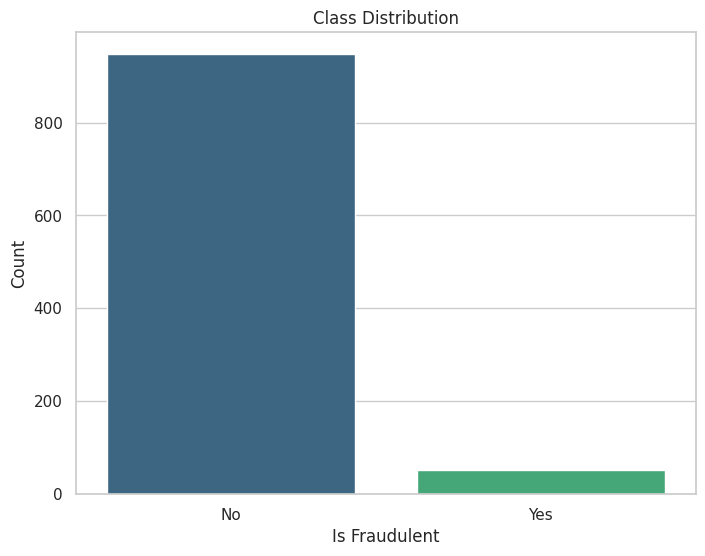

Class Distribution:
No     947
Yes     53
Name: Is Fraudulent, dtype: int64

Class Distribution Percentages:
No     94.7
Yes     5.3
Name: Is Fraudulent, dtype: float64


In [95]:
# @title Class imbalance and imbalance visualisation
def check_class_imbalance(df: pd.DataFrame, display_percent=True, display_count=True):
    # Separate features (X) from target variable (y)
    df['Is Fraudulent'] = df['Is Fraudulent'].map({0: 'No', 1: 'Yes'})
    X = df.drop("Is Fraudulent", axis=1)
    y = df["Is Fraudulent"]

    X = encode_categorical_features(X)

    plot_class_distribution(y)

    # Display the class distribution percentages
    if display_count:
        print("Class Distribution:")
        print(df['Is Fraudulent'].value_counts())

    if display_percent:
        print("\nClass Distribution Percentages:")
        print(df['Is Fraudulent'].value_counts(normalize=True) * 100)

    # Convert the target variable back to numeric
    y = y.map({'No': 0, 'Yes': 1})

    # Merge the features and target variable back into a single dataframe
    df = pd.concat([X, y], axis=1)

    return df

df = check_class_imbalance(df)

Observed **class imbalance** visualisation can be managed with Resampling:
(i) Oversampling i.e. increasing the number of instances in the minority class
Pros: (a) Improved model performance (b) Preserves information
Cons: (a) Overfitting risk (b) Increased training time
(ii) Undersampling i.e. reducing the number of instances in the majority class
Pros: (a) Reduced overfitting risk (b) Faster training time
Cons: (a) Loss of information (b) Risk of biased model (c) Potential Poor Performance on Majority Class (d) Sensitivity to sampling rate

In [96]:
# @title Features engineering
def feature_engineering(df: pd.DataFrame):
    # Date related nominal features
    df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.day_name()
    df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

    # Time of day looks redundant, so we drop it
    df = df.drop(['Date'], axis=1)

    return df

df = feature_engineering(df)

#### Data visualizations and insights

Data frame summary is given by info( ) function. It gives total number of rows in the dataset, column names, respective data type for every column, and any missing value.

From the output of info( ) function, we can see there is no NULL value in any column.

##### Data schema and basic info

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 49 to 561
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Amount                         1000 non-null   float64
 1   Card Type                      1000 non-null   int64  
 2   MCC Category                   1000 non-null   int64  
 3   Location                       1000 non-null   int64  
 4   Device                         1000 non-null   int64  
 5   Previous Transactions          1000 non-null   int64  
 6   Balance Before Transaction     1000 non-null   float64
 7   Time of Day                    1000 non-null   int64  
 8   Velocity                       1000 non-null   float64
 9   Customer Age                   1000 non-null   int64  
 10  Customer Income                1000 non-null   float64
 11  Card Limit                     1000 non-null   float64
 12  Credit Score                   1000 non-null   i

##### Data description
<ul>
<li> <u>describe()</u> gives quick overview of numeric variables, it computes summary statistics for numerical columns e.g. 25-percentile, mean, median and others.</li>
<li>**count** row in table below <u>shows number of non-missing values in each column</u>. Since, every column has a count of 1000 in output about <u>we conclude</u> that <u>there is no missing value in any column</u>.</li>
<li><u>include = 'all'</u> ensures that <u>categorical features are also included</u> in the result.<li></ul>

In [98]:
df.describe(include="all")

,Amount,Card Type,MCC Category,Location,Device,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Reputation,Merchant Location History,Spending Patterns,Online Transactions Frequency,Is Fraudulent,DayOfWeek,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,January
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,1000
mean,520.177431,0.965000,3.127000,2.043000,0.98400,4.399000,4975.500335,11.425000,0.000316,49.432000,82963.616616,10474.007101,575.5080,0.996000,9.754000,2746.678736,1.025000,0.053000,NaN,NaN
std,279.342434,0.818807,2.018154,1.444035,0.81634,2.828745,2841.249947,6.834697,0.296206,17.332853,37021.434932,5734.063838,156.4581,0.806619,5.395238,1311.365916,0.813041,0.224146,NaN,NaN
min,10.456991,0.000000,0.000000,0.000000,0.00000,0.000000,123.460877,0.000000,-0.499891,20.000000,20084.715403,526.910912,300.0000,0.000000,1.000000,500.559090,0.000000,0.000000,NaN,NaN
25%,277.978547,0.000000,1.000000,1.000000,0.00000,2.000000,2435.129681,5.000000,-0.256706,35.000000,51725.434929,5287.512915,441.5000,0.000000,5.000000,1561.576868,0.000000,0.000000,NaN,NaN
50%,546.816714,1.000000,3.000000,2.000000,1.00000,4.000000,4794.595477,11.000000,-0.011424,50.000000,81693.952416,10569.195493,574.5000,1.000000,10.000000,2839.222191,1.000000,0.000000,NaN,NaN
75%,760.074571,2.000000,5.000000,3.000000,2.00000,7.000000,7384.965602,17.000000,0.277094,64.000000,113430.363544,15474.888341,715.5000,2.000000,14.000000,3860.482775,2.000000,0.000000,NaN,NaN


##### Identify missing values
We use **isnull()** to create a Boolean mask **and then sum()** it <u>to count the number of missing values in each column</u>.

In [99]:
print(df.isnull().sum())

Amount                           0
Card Type                        0
MCC Category                     0
Location                         0
Device                           0
Previous Transactions            0
Balance Before Transaction       0
Time of Day                      0
Velocity                         0
Customer Age                     0
Customer Income                  0
Card Limit                       0
Credit Score                     0
Merchant Reputation              0
Merchant Location History        0
Spending Patterns                0
Online Transactions Frequency    0
Is Fraudulent                    0
DayOfWeek                        0
Month                            0
dtype: int64


##### Unique-value count for each column
**nunique( ) counts** the number of unique entries in each column of the dataframe we loaded. This is useful to understand <u>number of categories nominal and ordinal columns</u>.

**Candidates for nominal and ordinal columns:**
Card Type, MCC Category, Location, Device, Time of Day, Online Transactions Frequency

Further we determine numeric columns automatically and finally understand the nominal and ordinal columns of the financial transactions data.

In [100]:
print(df.nunique())

Amount                           1000
Card Type                           3
MCC Category                        7
Location                            5
Device                              3
Previous Transactions              10
Balance Before Transaction       1000
Time of Day                        24
Velocity                         1000
Customer Age                       60
Customer Income                  1000
Card Limit                       1000
Credit Score                      465
Merchant Reputation                 3
Merchant Location History          19
Spending Patterns                1000
Online Transactions Frequency       3
Is Fraudulent                       2
DayOfWeek                           1
Month                               1
dtype: int64


##### Skewness

In [101]:
df.skew()

<ipython-input-101-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Amount                          -0.117665
Card Type                        0.064623
MCC Category                    -0.069954
Location                        -0.029248
Device                           0.029425
Previous Transactions            0.026361
Balance Before Transaction       0.079183
Time of Day                     -0.008229
Velocity                        -0.006681
Customer Age                     0.017007
Customer Income                  0.073928
Card Limit                      -0.050666
Credit Score                    -0.040776
Merchant Reputation              0.007262
Merchant Location History        0.042392
Spending Patterns               -0.031202
Online Transactions Frequency   -0.045804
Is Fraudulent                    3.996472
dtype: float64

#### Visualizations

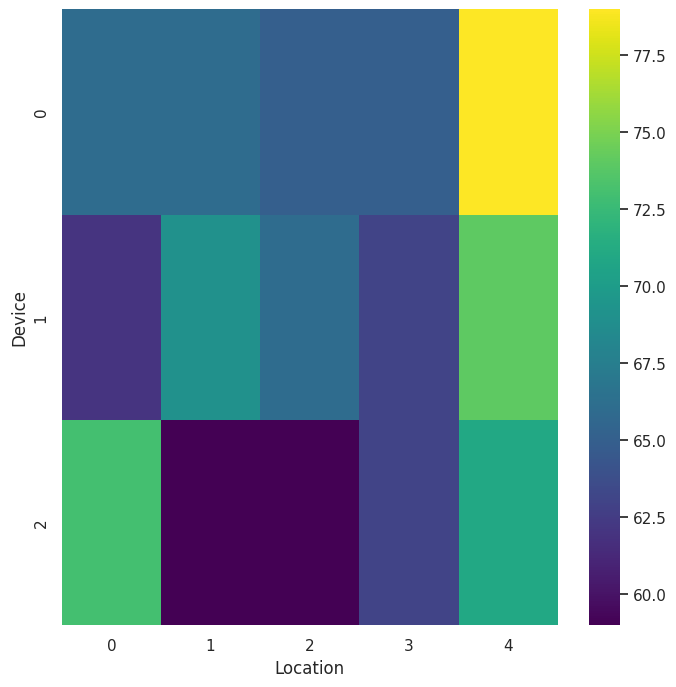

In [102]:
# @title Location vs Device
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Device'].value_counts()
    for x_label, grp in df.groupby('Location')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Location')
_ = plt.ylabel('Device')

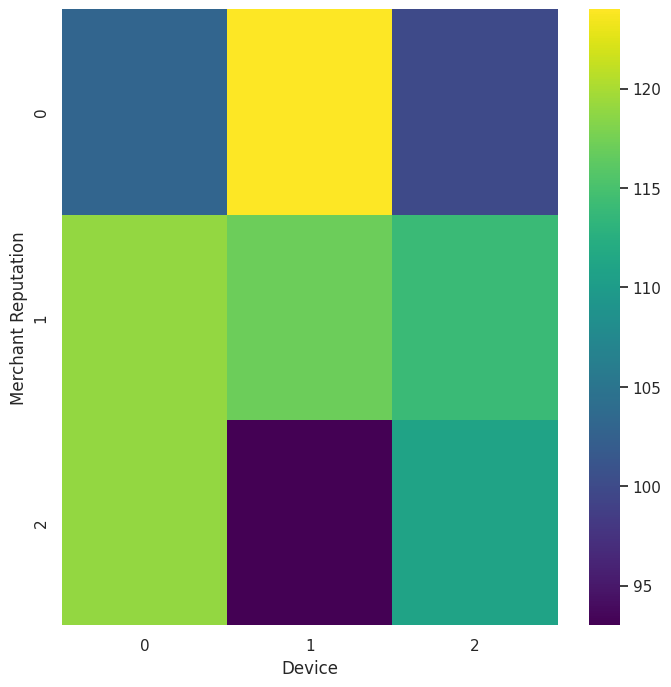

In [103]:
# @title Device vs Merchant Reputation

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Merchant Reputation'].value_counts()
    for x_label, grp in df.groupby('Device')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Device')
_ = plt.ylabel('Merchant Reputation')

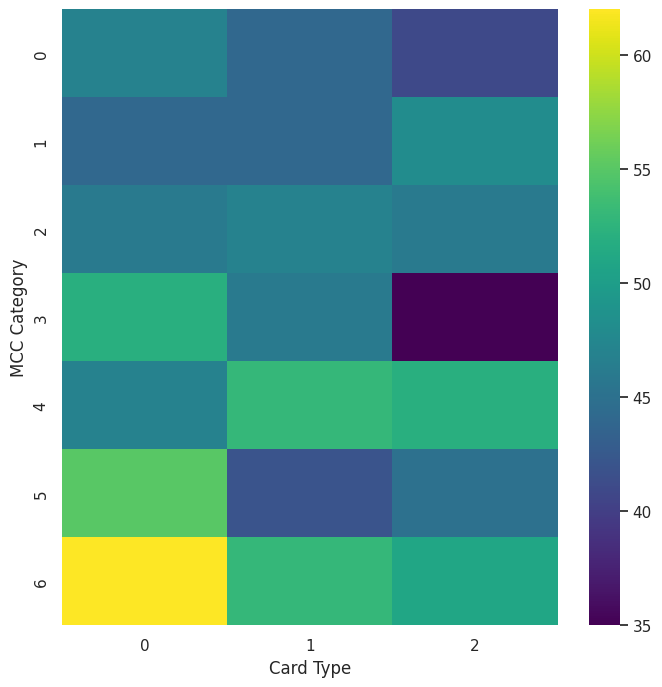

In [104]:
# @title Card Type vs MCC Category

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MCC Category'].value_counts()
    for x_label, grp in df.groupby('Card Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Card Type')
_ = plt.ylabel('MCC Category')

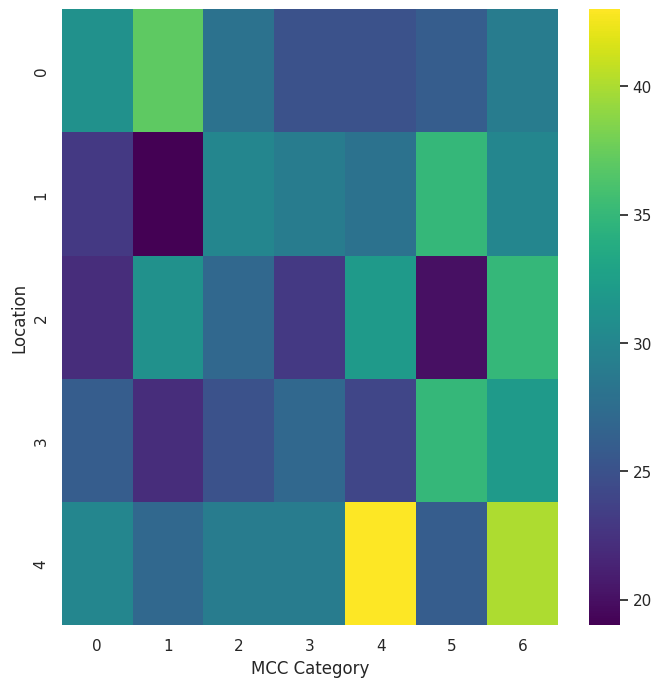

In [105]:
# @title MCC Category vs Location

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Location'].value_counts()
    for x_label, grp in df.groupby('MCC Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MCC Category')
_ = plt.ylabel('Location')

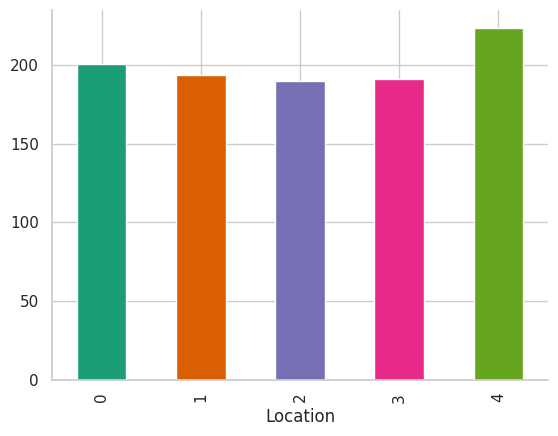

In [106]:
# @title Location
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Location').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

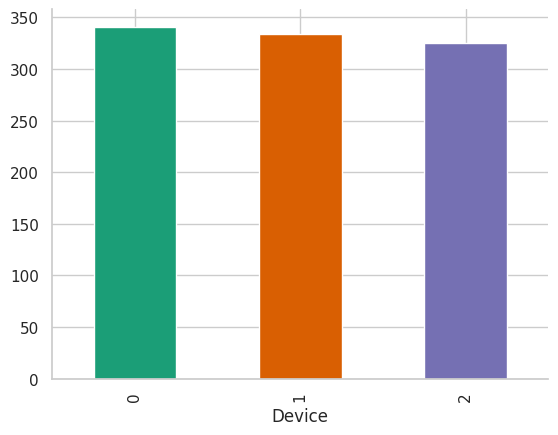

In [107]:
# @title Device

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Device').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

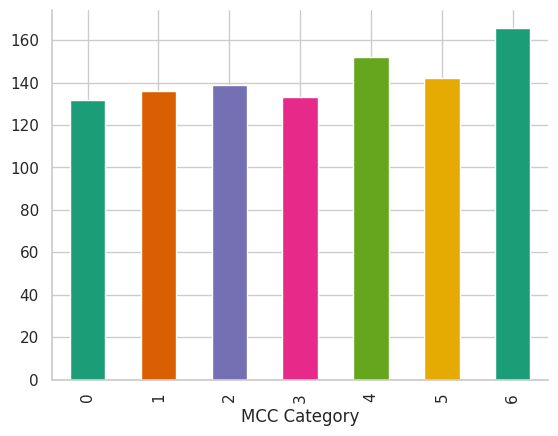

In [108]:
# @title MCC Category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('MCC Category').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

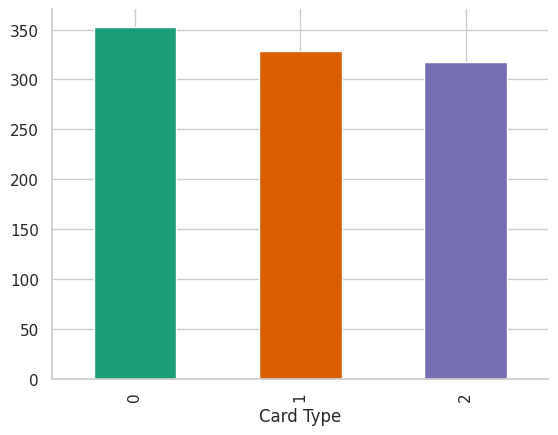

In [109]:
# @title Card Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Card Type').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

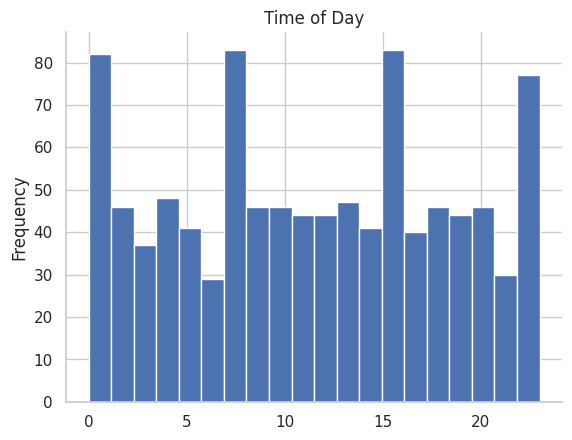

In [110]:
# @title Time of Day

from matplotlib import pyplot as plt
df['Time of Day'].plot(kind='hist', bins=20, title='Time of Day')
plt.gca().spines[['top', 'right',]].set_visible(False)

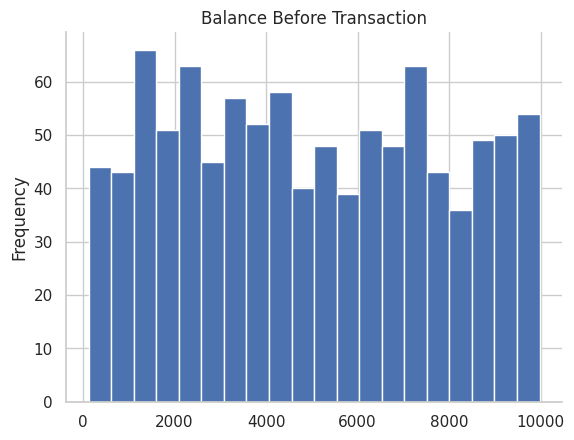

In [111]:
# @title Balance Before Transaction
from matplotlib import pyplot as plt
df['Balance Before Transaction'].plot(kind='hist', bins=20, title='Balance Before Transaction')
plt.gca().spines[['top', 'right',]].set_visible(False)

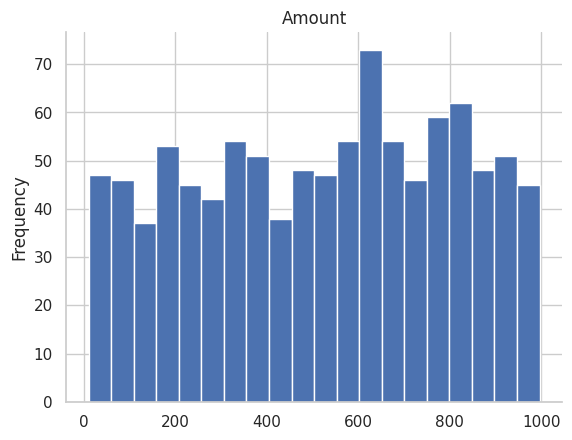

In [112]:
# @title Amount
from matplotlib import pyplot as plt
df['Amount'].plot(kind='hist', bins=20, title='Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

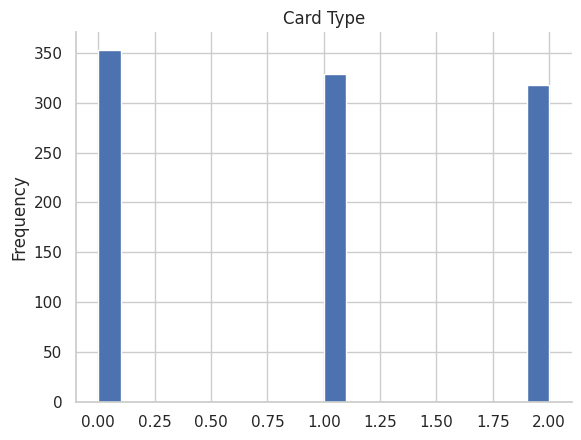

In [113]:
# @title Card Type
from matplotlib import pyplot as plt
df['Card Type'].plot(kind='hist', bins=20, title='Card Type')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Data Pre-processing: Features Creation

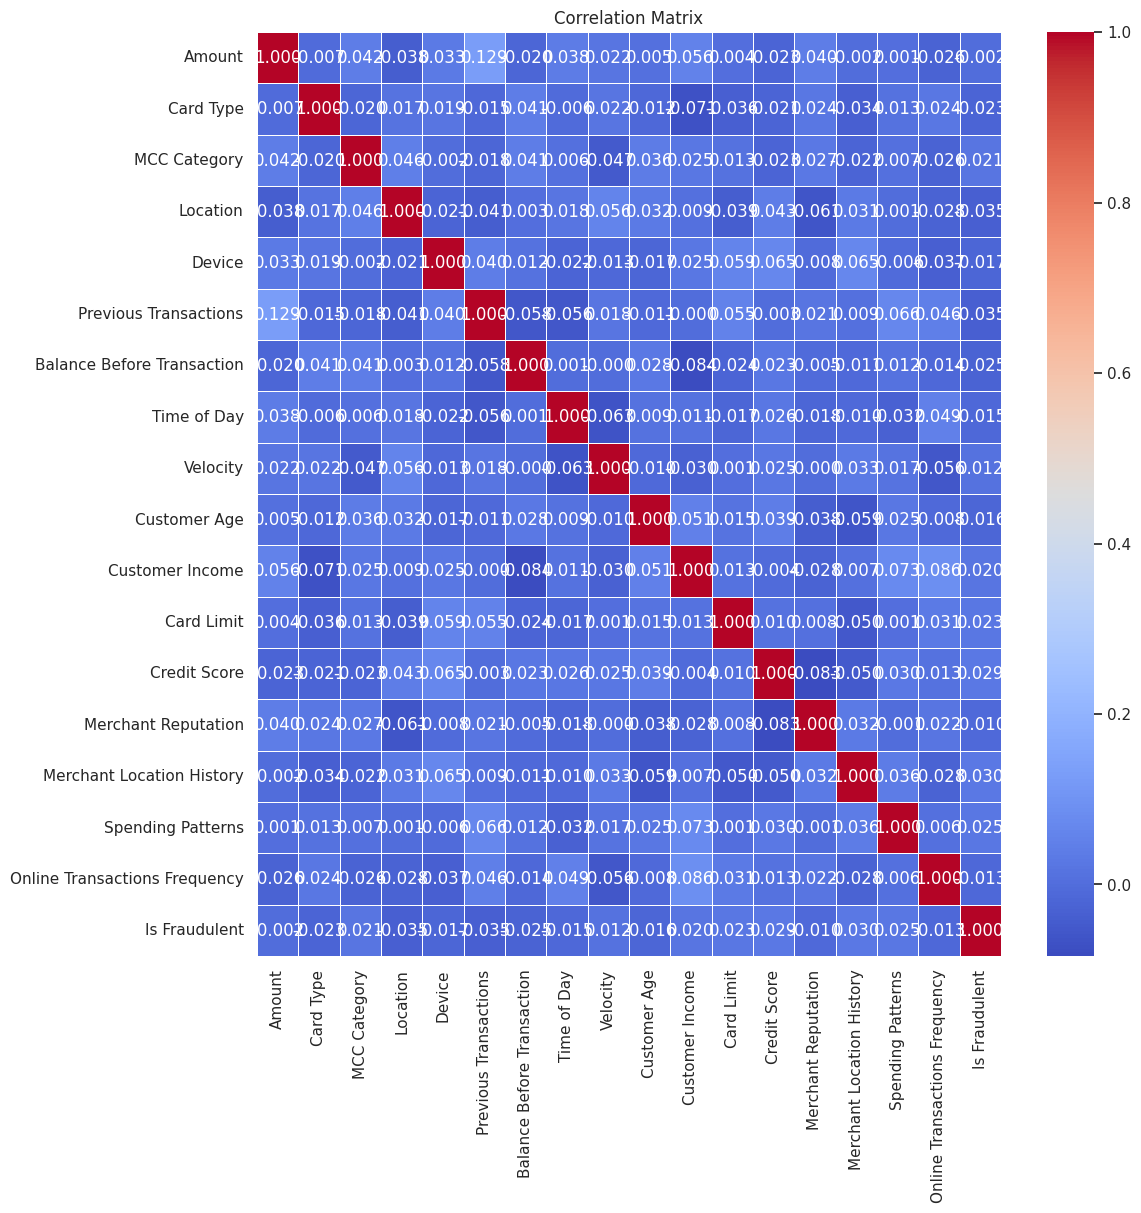

In [114]:
# @title Correlation analysis before creating new features
def correlation_analysis(df: pd.DataFrame):
    correlation_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(12, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

correlation_analysis(df)

New features created:
* Day of week - Nominal
* Month of Year - Nominal
* Amount to Income - Ratio
* Percentage of Balance Spent
* Available Balance After Transaction
* ...

### Correlation analysis and visualisation

Normalization is not necessary before computing correlation coefficients between variables. Correlation measures the linear relationship between two variables, and it is not affected by the scale of the variables. Therefore, you can calculate correlation coefficients on raw data without normalizing it.

- 𝑟 > 0 indicates positive correlation.
- 𝑟 < 0 indicates negative correlation.
- r = 1 is the maximum possible value of 𝑟, showing perfect positive linear relationship between 2 variables
- Data fields on diagonal always have r = 1 as a data field always has a perfect linear relationship to itself.
- r = −1 is the minimum possible value of 𝑟, showing perfect negative linear relationship between variables.
- When r ≈ 0, means weak correlation between variables.

**High Positive Correlations:**
- "Amount" and "Previous Transactions": 0.13
- "Customer Income" and "Spending Patterns": 0.073
- "Previous Transactions" and "Spending Patterns": 0.066
- "Time of Day" and "Spending Patterns": 0.032
- "Time of Day" and "Credit Score": 0.026

**High Negative Correlations:**
- "Merchant Location History" and "Card Limit": -0.050
- "Credit Score" and "Merchant Location History": -0.050
- "Velocity" and "Time of Day": -0.063
- "Customer Income" and "Balance Before Transaction": -0.084

### Model Building

In [115]:
# @title Indentifying Feature Types
def get_column_types(dframe: pd.DataFrame):
  all_features = dframe.columns
  op_features = ["Is Fraudulent"]
  numeric_features = list(set(dframe._get_numeric_data().columns) - set(op_features))
  nominal_and_ordinal_features = list(set(all_features) - set(numeric_features) - set(op_features))
  ordinal_only_features = list(["Merchant Reputation", 'Online Transactions Frequency'])
  nominal_only_features = list(set(nominal_and_ordinal_features) - set(ordinal_only_features))

  return {
      "numeric_features": numeric_features,
      "nominal_only_features": nominal_only_features,
      "ordinal_only_features": ordinal_only_features,
      "nominal_and_ordinal_features": nominal_and_ordinal_features,
      "output_features": op_features
  }

col_types = get_column_types(df)

In [116]:
def get_ig_for_features(df: pd.DataFrame):
    X = df.drop(['Is Fraudulent'], axis=1)
    y = df['Is Fraudulent']

    # Encode categorical features
    categorical_features = X.select_dtypes(include=['object']).columns
    for feature in categorical_features:
        encoder = LabelEncoder()
        X[feature] = encoder.fit_transform(X[feature])

    # Apply Information Gain
    ig = mutual_info_regression(X, y) * 100

    feature_scores = {}
    for i in range(len(X.columns)):
        feature_scores[X.columns[i]] = ig[i]

    sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

    for feature, score in sorted_features:
        print('Feature:', feature, 'Score:', score)

    return sorted_features, y, X

def plot_ig_for_features(sorted_features):
  fig, ax = plt.subplots()
  y_pos = np.arange(len(sorted_features))
  ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
  ax.set_yticks(y_pos)
  ax.set_yticklabels([feature for feature, score in sorted_features])
  # ax.invert_yaxis()  # Labels read top-to-bottom
  ax.set_xlabel("Importance Score")
  ax.set_title("Feature Importance Scores (Information Gain)")

  # Add importance scores as labels on the horizontal bar chart
  for i, v in enumerate([score for feature, score in sorted_features]):
      ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
  plt.show()


In [117]:
def split_data_fit_model(df, col_types: dict, model, test_size: float = 0.2):
  # Separate features (X) from target variable (y)
  X = df.drop("Is Fraudulent", axis=1)
  y = df["Is Fraudulent"]

  # Training to testing split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=71)

  # Preprocessing non-numeric features
  preprocessor = ColumnTransformer(
      transformers=[
          ("num", StandardScaler(), col_types["numeric_features"]),
          ("nominal", OneHotEncoder(), col_types["nominal_only_features"]),
          ("ordinal", OrdinalEncoder(), col_types["ordinal_only_features"])
      ])

  pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                            ("pca", PCA(n_components=0.95)),
                            ("feature_selection", SelectKBest(f_classif, k=5)),
                            ("classifier", model)])
  pipeline.fit(X_train, y_train)

  return X_test, y_test, pipeline



In [118]:
def predict(xtest, ytest, pipeline):
  ypred = pipeline.predict(xtest)
  cm = confusion_matrix(ytest, ypred)
  y_prob_logreg = pipeline.predict_proba(xtest)[:, 1]
  roc_auc_logreg = roc_auc_score(ytest, y_prob_logreg)

  print(f"ROC AUC: {roc_auc_logreg}")

  return cm, ypred

In [119]:
def print_model_performance(cm, ytest, ypred, model_name: str):
  print("Classification Report:" + model_name)
  print(classification_report(ytest, ypred))

  print("Confusion Matrix:")
  print(cm)

  print("Accuracy Score:")
  print(accuracy_score(ytest, ypred))

  print("\n\n")

In [120]:
def print_model_performance(cm, ytest, ypred, model_name: str):
  print("Classification Report:" + model_name)
  print(classification_report(ytest, ypred))

  print("Confusion Matrix:")
  print(cm)

  print("Accuracy Score:")
  print(accuracy_score(ytest, ypred))

  print("\n\n")

def plot_confusion_matrix(cm, model, model_name: str):
  cmap = sns.color_palette("pastel")

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False,
              xticklabels=model.classes_,
              yticklabels=model.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix - ' + model_name)
  plt.show()

In [121]:
def plot_roc_auc_curve(xtest, ytest, pipeline, model_name):
    label_encoder = LabelEncoder()
    y_test_numeric = label_encoder.fit_transform(ytest)

    y_prob_logreg = pipeline.predict_proba(xtest)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob_logreg)
    roc_auc_logreg = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_logreg))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - ' + model_name)
    plt.legend(loc='lower right')
    plt.show()

In [122]:
def create_model(model_name: str) -> object:
    if model_name == "AdaBoostClassifier":
        model = AdaBoostClassifier(random_state=71)
    elif model_name == "DecisionTreeClassifier":
        model = DecisionTreeClassifier(random_state=71)
    elif model_name == "GaussianNB":
        model = GaussianNB(random_state=71, var_smoothing=1e-09)
    elif model_name == "GradientBoostingClassifier":
        model = GradientBoostingClassifier(random_state=71)
    elif model_name == "KNeighborsClassifier":
        model = KNeighborsClassifier()
    elif model_name == "LogisticRegression":
        model = LogisticRegression(random_state=71, max_iter=1000, C=1.0, solver='lbfgs')
    elif model_name == "RandomForestClassifier":
        model = RandomForestClassifier(random_state=71)
    elif model_name == "SVC":
        model = SVC(random_state=71)
    else:
        raise ValueError("Invalid model name: " + model_name)

    return model

In [123]:
@track_time_and_space
def run(df, model, col_types: dict, model_name: str, test_size: float = 0.2):
    X_test, y_test, pipeline = split_data_fit_model(df, col_types, model=model, test_size=test_size)
    cm, ypred = predict(X_test, y_test, pipeline)

    print_model_performance(cm, y_test, ypred, model_name=model_name)
    plot_confusion_matrix(cm, model=model, model_name=model_name)
    plot_roc_auc_curve(X_test, y_test, pipeline, model_name=model_name)

#### Logistic Regression

ROC AUC: 0.25859106529209624
Classification Report:Logistic Regression 20
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       194
           1       0.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.97      0.96       200

Confusion Matrix:
[[194   0]
 [  6   0]]
Accuracy Score:
0.97





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


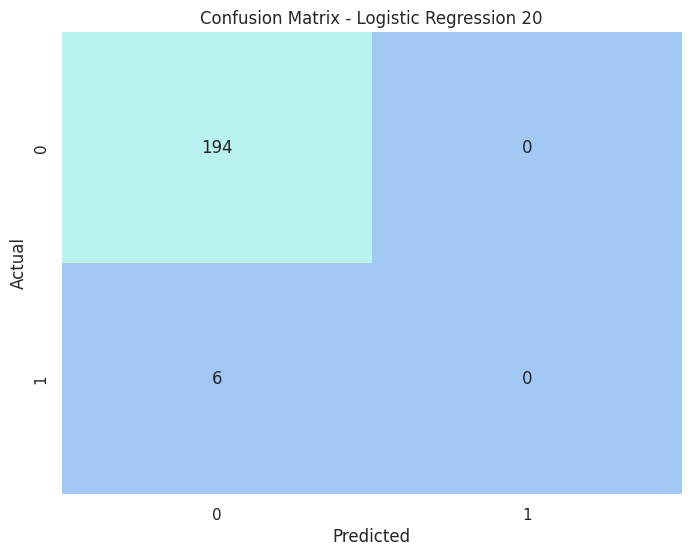

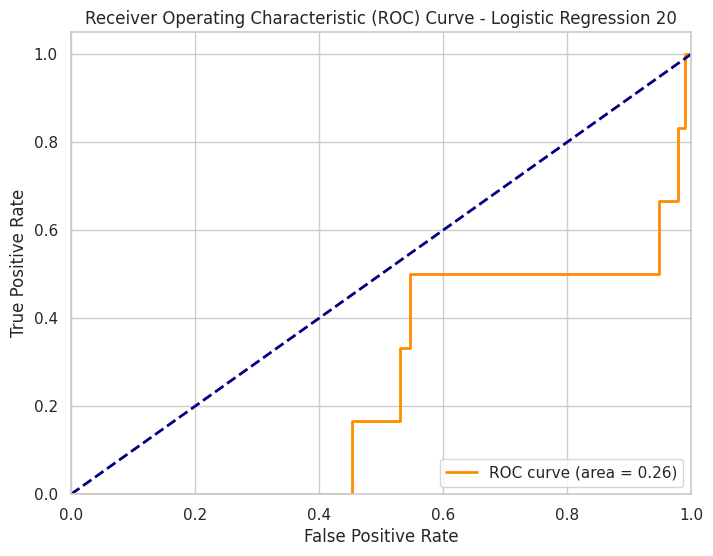

Execution time: 1.1323606967926025 seconds | Memory usage: 0.0 KB


(None, 1.1323606967926025, 0.0)

In [124]:
# @title Logistic Regression: 20% test data
logreg_20 = LogisticRegression(random_state=71, max_iter=1000)
mn_20 = "Logistic Regression 20"
run(df=df, model=logreg_20, col_types=col_types, model_name=mn_20, test_size=0.20)

ROC AUC: 0.3574368018812463
Classification Report:Logistic Regression 25
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       243
           1       0.00      0.00      0.00         7

    accuracy                           0.97       250
   macro avg       0.49      0.50      0.49       250
weighted avg       0.94      0.97      0.96       250

Confusion Matrix:
[[243   0]
 [  7   0]]
Accuracy Score:
0.972





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


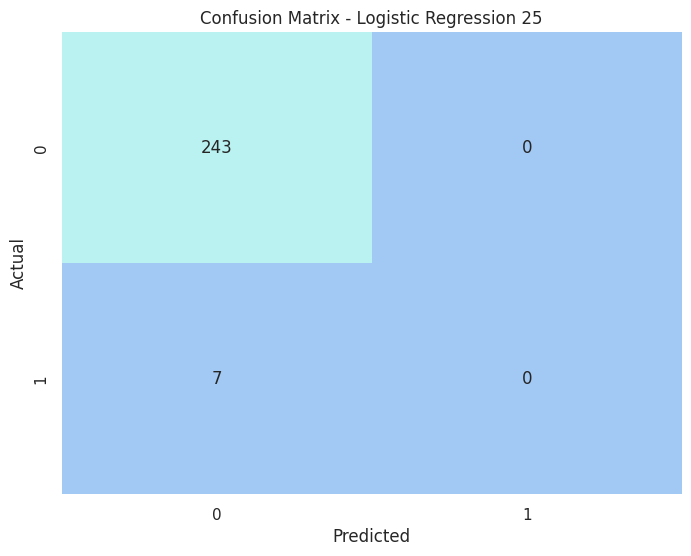

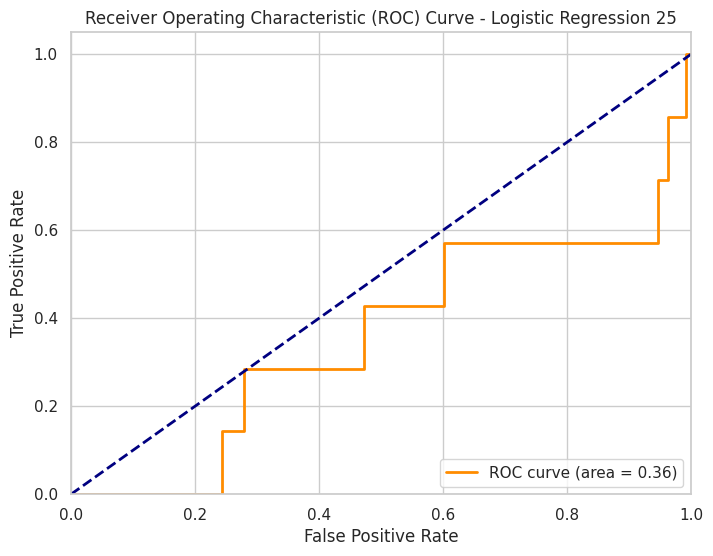

Execution time: 1.139305591583252 seconds | Memory usage: 0.0 KB


(None, 1.139305591583252, 0.0)

In [125]:
# @title Logistic Regression: 25% test data
logreg_25 = LogisticRegression(random_state=71, max_iter=1000)
mn_25 = "Logistic Regression 25"
run(df, logreg_20, col_types, model_name=mn_25, test_size=0.25)

In [126]:
# @title Hyperparameter tuning: Logistic Regression


#### Decision Tree

ROC AUC: 0.4895833333333333
Classification Report:Decision Tree 15
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       144
           1       0.00      0.00      0.00         6

    accuracy                           0.94       150
   macro avg       0.48      0.49      0.48       150
weighted avg       0.92      0.94      0.93       150

Confusion Matrix:
[[141   3]
 [  6   0]]
Accuracy Score:
0.94





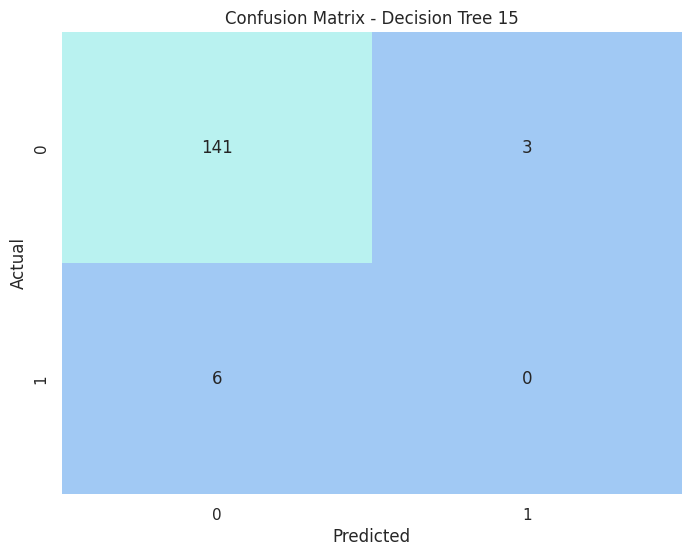

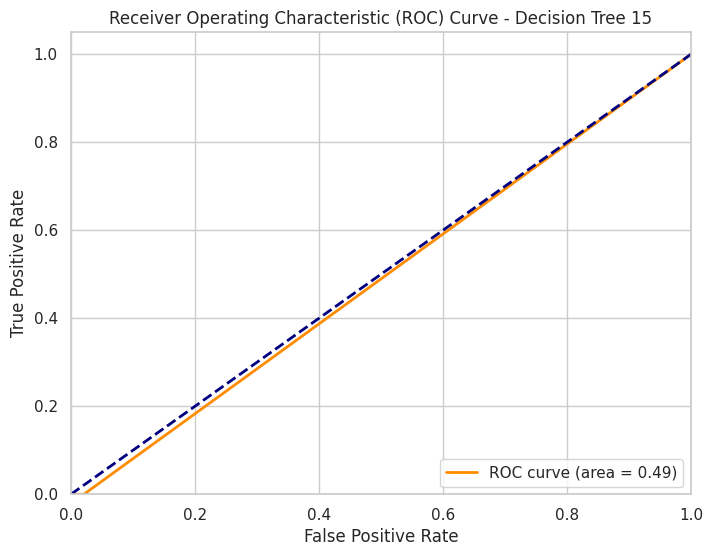

Execution time: 2.1653988361358643 seconds | Memory usage: 0.0 KB


(None, 2.1653988361358643, 0.0)

In [127]:
# @title Decision Tree: 15% test data
decision_tree_15 = DecisionTreeClassifier(random_state=71)
mn_dt_15 = "Decision Tree 15"
run(df, decision_tree_15, col_types, model_name=mn_dt_15, test_size=0.15)

ROC AUC: 0.4587628865979381
Classification Report:Decision Tree 20
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       194
           1       0.00      0.00      0.00         6

    accuracy                           0.89       200
   macro avg       0.48      0.46      0.47       200
weighted avg       0.94      0.89      0.91       200

Confusion Matrix:
[[178  16]
 [  6   0]]
Accuracy Score:
0.89





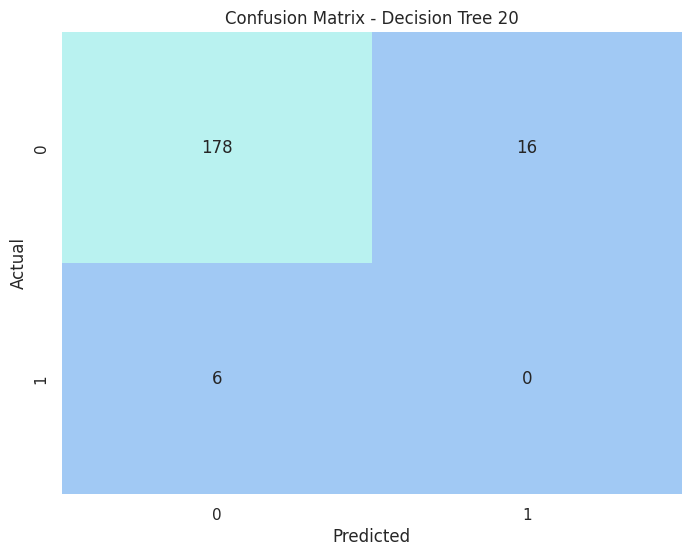

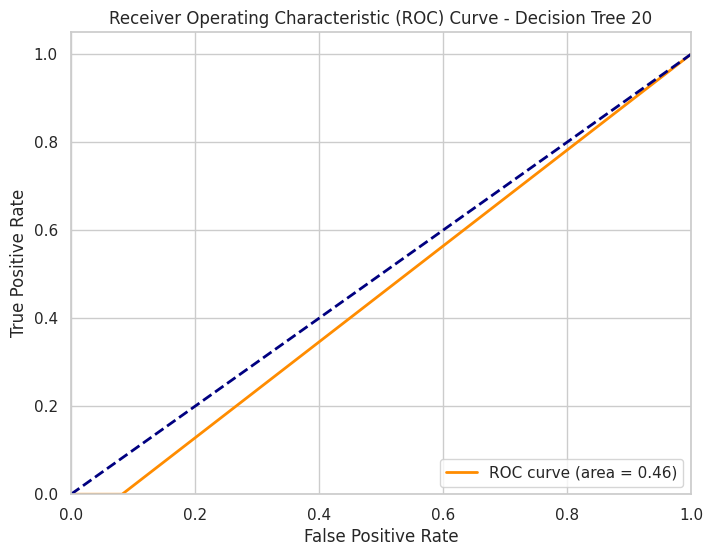

Execution time: 2.124790668487549 seconds | Memory usage: 0.0 KB


(None, 2.124790668487549, 0.0)

In [128]:
# @title Decision Tree: 20% test data
decision_tree_20 = DecisionTreeClassifier(random_state=71)
mn_dt_20 = "Decision Tree 20"
run(df, decision_tree_20, col_types, model_name=mn_dt_20, test_size=0.20)

ROC AUC: 0.4670781893004115
Classification Report:Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       243
           1       0.00      0.00      0.00         7

    accuracy                           0.91       250
   macro avg       0.49      0.47      0.48       250
weighted avg       0.94      0.91      0.93       250

Confusion Matrix:
[[227  16]
 [  7   0]]
Accuracy Score:
0.908





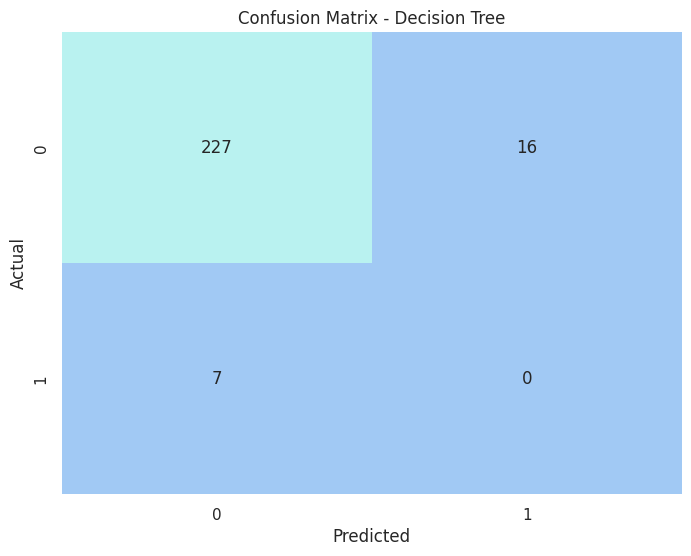

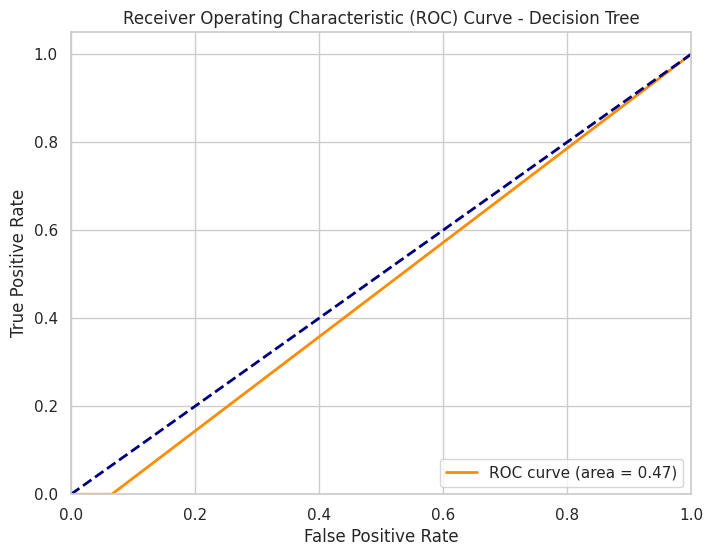

Execution time: 1.6971580982208252 seconds | Memory usage: 0.0 KB


(None, 1.6971580982208252, 0.0)

In [129]:
# @title Decision Tree: 25% test data
decision_tree_25 = DecisionTreeClassifier(random_state=71)
mn_dt_25 = "Decision Tree"
run(df, decision_tree_25, col_types, model_name=mn_dt_25, test_size=0.25)

In [130]:
# @title Hyperparameter tuning: Decision Tree

### Correlational analysis effect on feature selection

## Data Pre-processing and cleaning
<ol>
<li>Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore few latest data balancing tasks and its effect on model evaluation parameters.</li>
<li>Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks. Explore a few techniques for identifying feature importance for your feature engineering task.</li>

## Performance
<hr/>
<table width="100%" align="right">
<caption><font size="+1">Observations</font></caption>
  <tr>
    <th></th>
    <th>Accuracy</th>
    <th>Precision (Yes)</th>
    <th>Recall (Yes)</th>
    <th>F1-Score (Yes)</th>
  </tr>
  <tr>
    <th>Decision Tree 15</th>
    <td>0.875</td>
    <td>0.13</td>
    <td>0.14</td>
    <td>0.14</td>
  </tr>
  <tr>
    <th>Decision Tree 20</th>
    <td>0.875</td>
    <td>0.13</td>
    <td>0.14</td>
    <td>0.14</td>
  </tr>
  <tr>
    <th>Decision Tree 25</th>
    <td>0.875</td>
    <td>0.13</td>
    <td>0.14</td>
    <td>0.14</td>
  </tr>
  <tr>
    <th>Logistic Regression 15</th>
    <td>0.92</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
  </tr>
  <tr>
    <th>Logistic Regression 20</th>
    <td>0.93</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
  </tr>
  <tr>
    <th>Logistic Regression 25</th>
    <td>0.97</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
  </tr>
</table>
<hr/>

<table width="100%" align="right">
<caption><font size="+1">Insights</font></caption>
</table>

## Comparison
**Accuracy:** The Logistic Regression model has a higher accuracy (93%) compared to the Decision Tree model (87.5%). However, accuracy may not be the sole metric to consider, especially in imbalanced datasets.

**Precision (Yes):** Both models have very low precision for the "Yes" class. This means that when they predict a transaction as fraudulent, it is rarely correct. Precision is an important metric when the cost of false positives is high.

**Recall (Yes):** Both models have low recall for the "Yes" class. This indicates that they miss a significant portion of actual fraudulent transactions. Recall is important when the cost of false negatives (missing a fraudulent transaction) is high.

**F1-Score (Yes):** The F1-Score combines precision and recall, providing a balance between the two. Both models have low F1-Scores for the "Yes" class.

## Conclusion
While Logistic Regression has a higher overall accuracy, it performs poorly on identifying fraudulent transactions ("Yes" class), with precision, recall, and F1-Score all being very low.
The Decision Tree model has a lower accuracy but may provide a more balanced performance in terms of precision and recall for the "Yes" class.

# Assignment Part 2

## Model Building
Build ML models using K-Nearest Neighbors (K-NN), Support Vector Machine (SVM),
Naive Bayesian, Random Forest, and Ada boost

### K-Nearest Neighbors

ROC AUC: 0.3680555555555556
Classification Report:K-Nearest Neighbors Classification 15
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       144
           1       0.00      0.00      0.00         6

    accuracy                           0.95       150
   macro avg       0.48      0.50      0.49       150
weighted avg       0.92      0.95      0.94       150

Confusion Matrix:
[[143   1]
 [  6   0]]
Accuracy Score:
0.9533333333333334





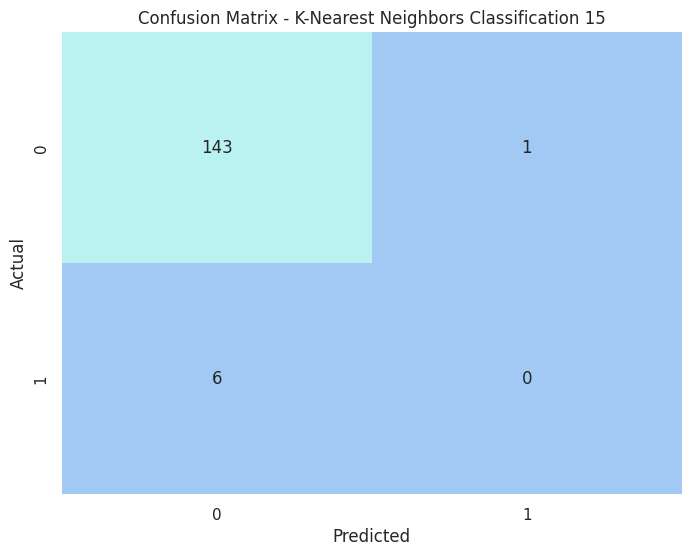

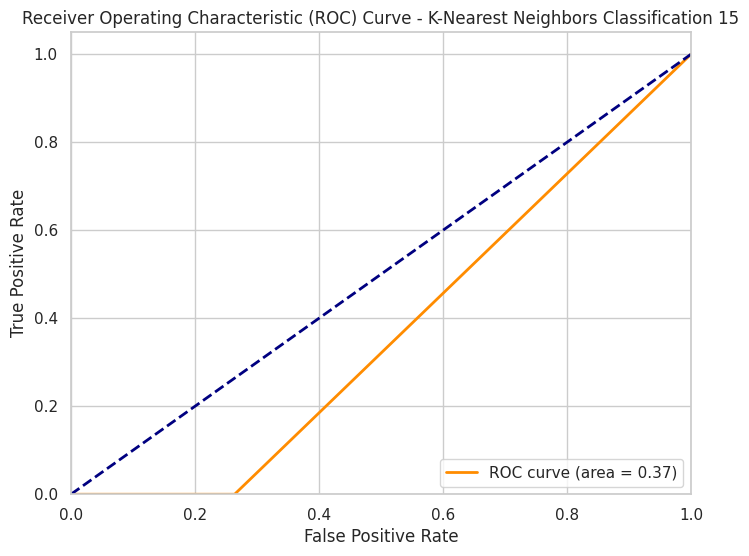

Execution time: 1.526484727859497 seconds | Memory usage: 0.0 KB


(None, 1.526484727859497, 0.0)

In [131]:
from sklearn.neighbors import KNeighborsClassifier

knn_model_15 = KNeighborsClassifier(n_neighbors=5)
mn_knn_15 = "K-Nearest Neighbors Classification 15"
run(df, knn_model_15, col_types, model_name=mn_knn_15, test_size=0.15)

ROC AUC: 0.4424398625429553
Classification Report:K-Nearest Neighbors Classification 20
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       194
           1       0.00      0.00      0.00         6

    accuracy                           0.96       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.96      0.95       200

Confusion Matrix:
[[193   1]
 [  6   0]]
Accuracy Score:
0.965





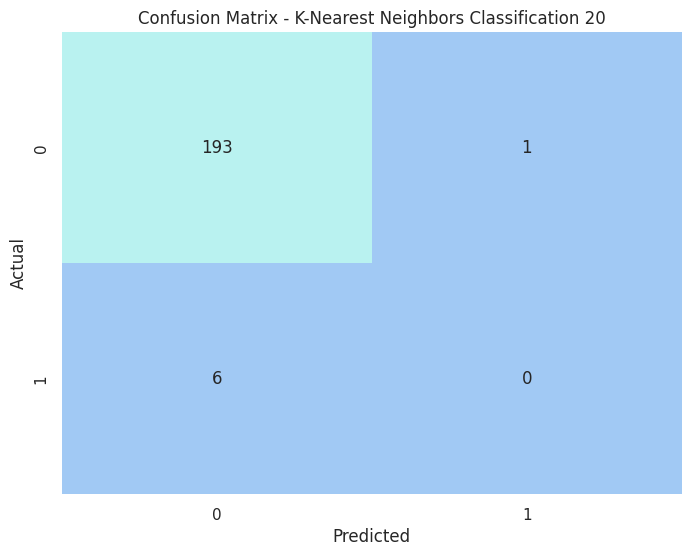

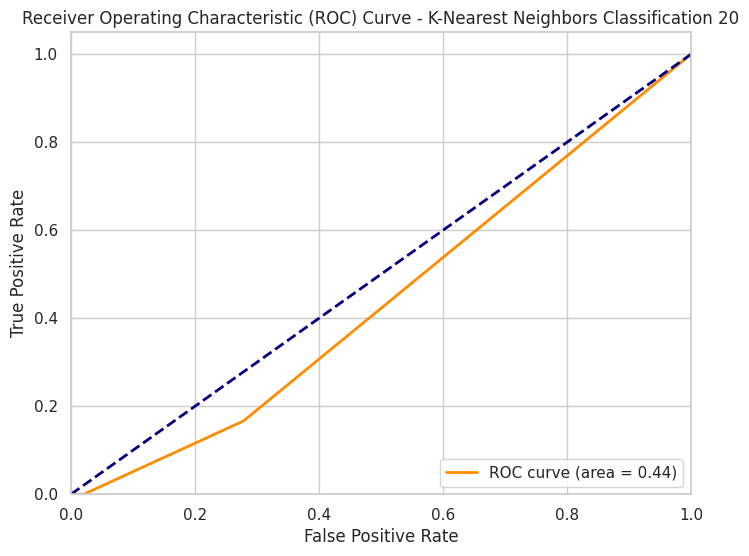

Execution time: 1.502626657485962 seconds | Memory usage: 0.0 KB


(None, 1.502626657485962, 0.0)

In [132]:
from sklearn.neighbors import KNeighborsClassifier

knn_model_20 = KNeighborsClassifier(n_neighbors=5)
mn_knn_20 = "K-Nearest Neighbors Classification 20"
run(df, knn_model_20, col_types, model_name=mn_knn_20, test_size=0.20)

ROC AUC: 0.33333333333333337
Classification Report:K-Nearest Neighbors Classification 15
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       243
           1       0.00      0.00      0.00         7

    accuracy                           0.97       250
   macro avg       0.49      0.50      0.49       250
weighted avg       0.94      0.97      0.96       250

Confusion Matrix:
[[242   1]
 [  7   0]]
Accuracy Score:
0.968





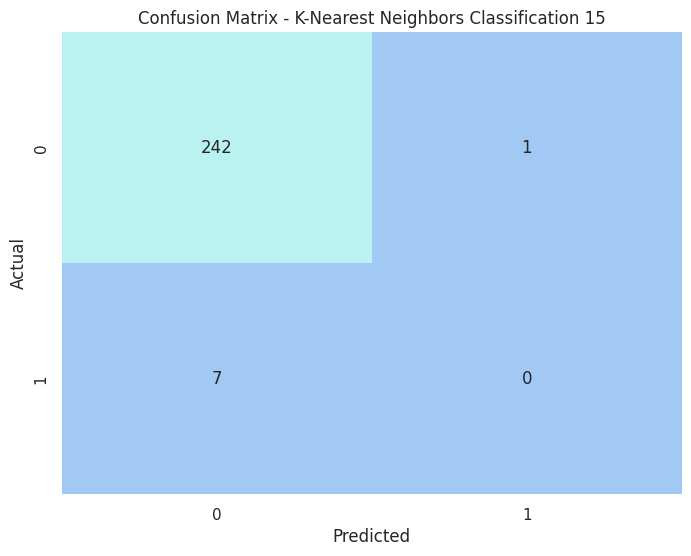

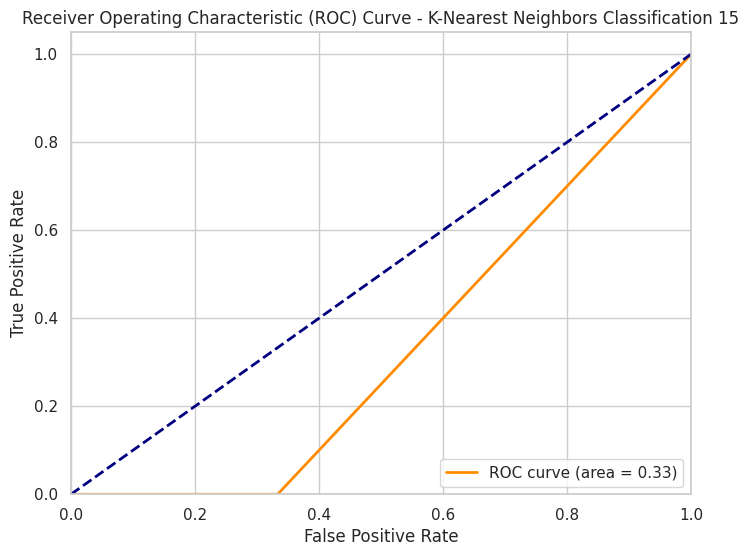

Execution time: 1.1393792629241943 seconds | Memory usage: 0.0 KB


(None, 1.1393792629241943, 0.0)

In [133]:
from sklearn.neighbors import KNeighborsClassifier

knn_model_25 = KNeighborsClassifier(n_neighbors=5)
mn_knn_25 = "K-Nearest Neighbors Classification 25"
run(df, knn_model_25, col_types, model_name=mn_knn_15, test_size=0.25)

### SVM

In [134]:
from sklearn.svm import SVC

svm_model_15 = SVC(kernel='linear')
svm_name_15 = "Support Vector Machine 15"
# run(df, svm_model_15, col_types, model_name=svm_name_15, test_size=0.15)

### Naive Bayes

ROC AUC: 0.25925925925925924
Classification Report:Naive Bayes 15
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       144
           1       0.00      0.00      0.00         6

    accuracy                           0.96       150
   macro avg       0.48      0.50      0.49       150
weighted avg       0.92      0.96      0.94       150

Confusion Matrix:
[[144   0]
 [  6   0]]
Accuracy Score:
0.96





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


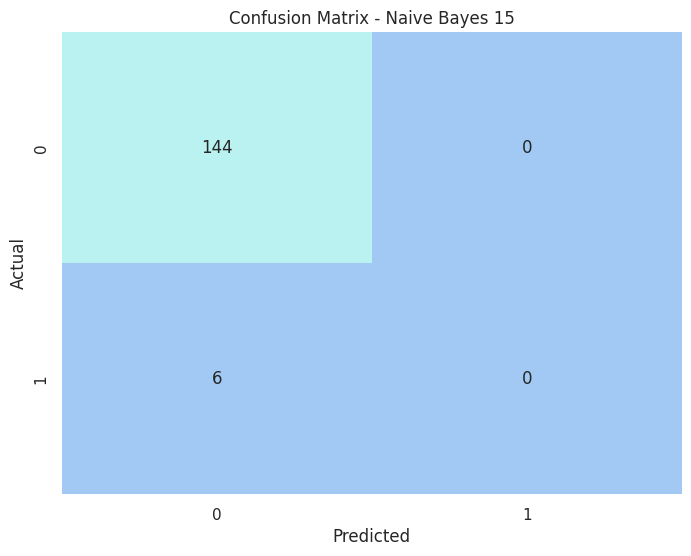

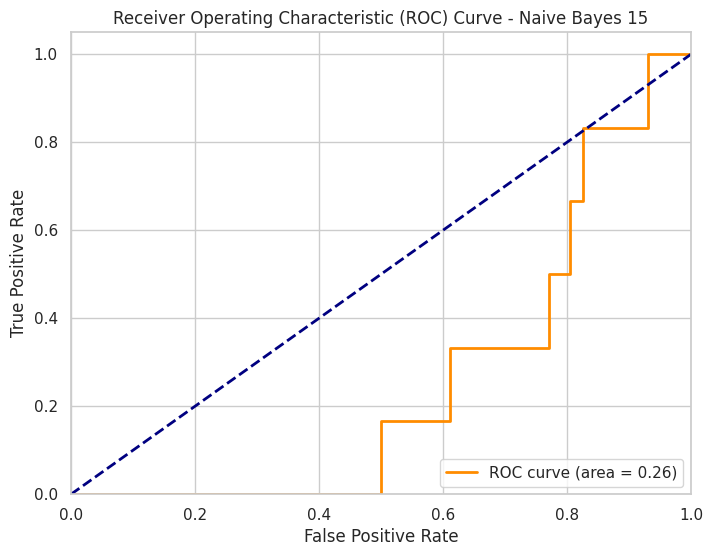

Execution time: 1.0108063220977783 seconds | Memory usage: 0.0 KB


(None, 1.0108063220977783, 0.0)

In [135]:
# @title Naive Bayes: 15% test data
from sklearn.naive_bayes import GaussianNB, MultinomialNB

nb_model_15 = GaussianNB()
nb_name_15 = "Naive Bayes 15"
run(df, nb_model_15, col_types, model_name=nb_name_15, test_size=0.15)

ROC AUC: 0.26718213058419243
Classification Report:Naive Bayes 20
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       194
           1       0.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.97      0.96       200

Confusion Matrix:
[[194   0]
 [  6   0]]
Accuracy Score:
0.97





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


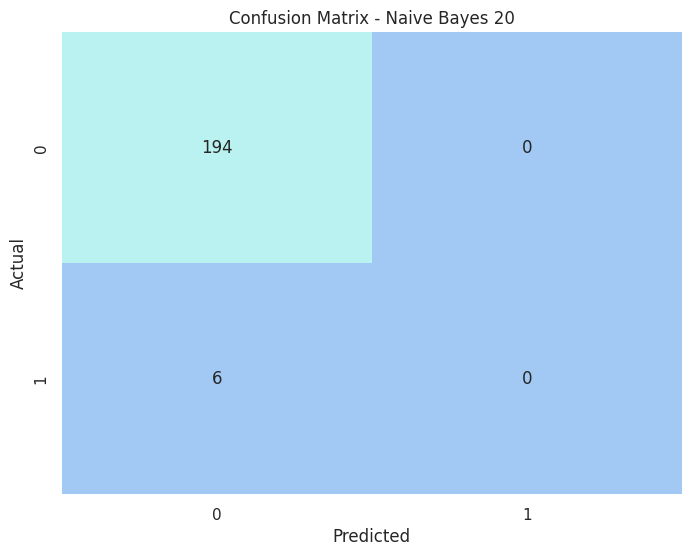

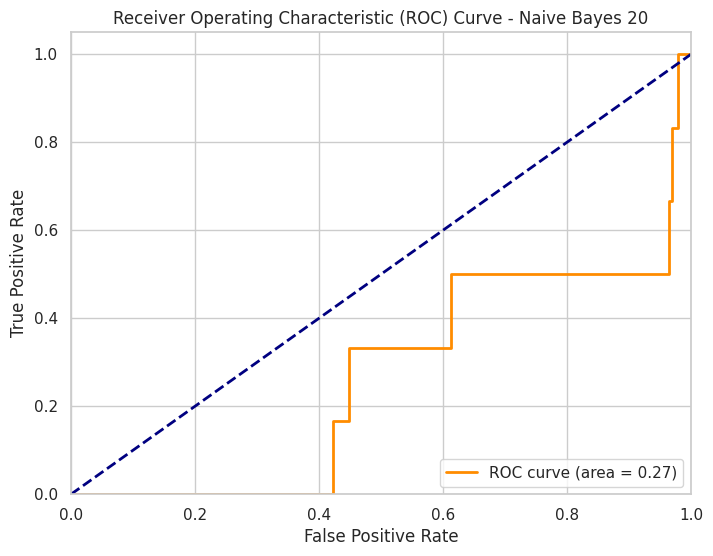

Execution time: 1.0433368682861328 seconds | Memory usage: 0.0 KB


(None, 1.0433368682861328, 0.0)

In [136]:
# @title Naive Bayes: 20% test data
from sklearn.naive_bayes import GaussianNB, MultinomialNB

nb_model_20 = GaussianNB()
nb_name_20 = "Naive Bayes 20"
run(df, nb_model_20, col_types, model_name=nb_name_20, test_size=0.20)

ROC AUC: 0.45796590241034685
Classification Report:Naive Bayes 25
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       243
           1       0.00      0.00      0.00         7

    accuracy                           0.97       250
   macro avg       0.49      0.50      0.49       250
weighted avg       0.94      0.97      0.96       250

Confusion Matrix:
[[243   0]
 [  7   0]]
Accuracy Score:
0.972





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


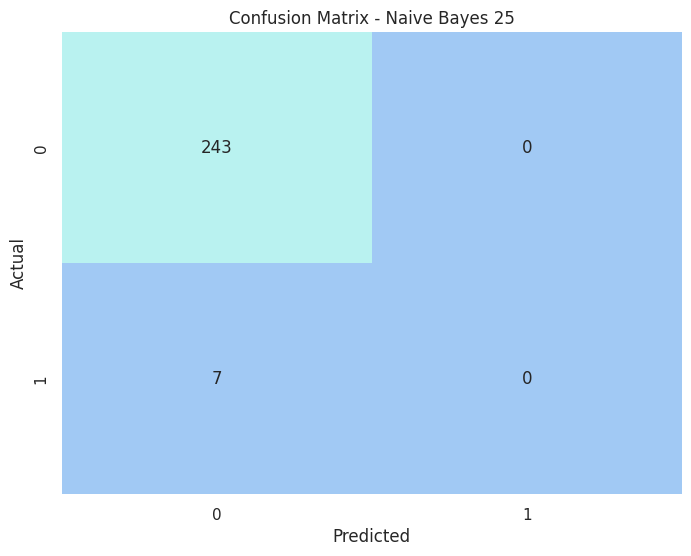

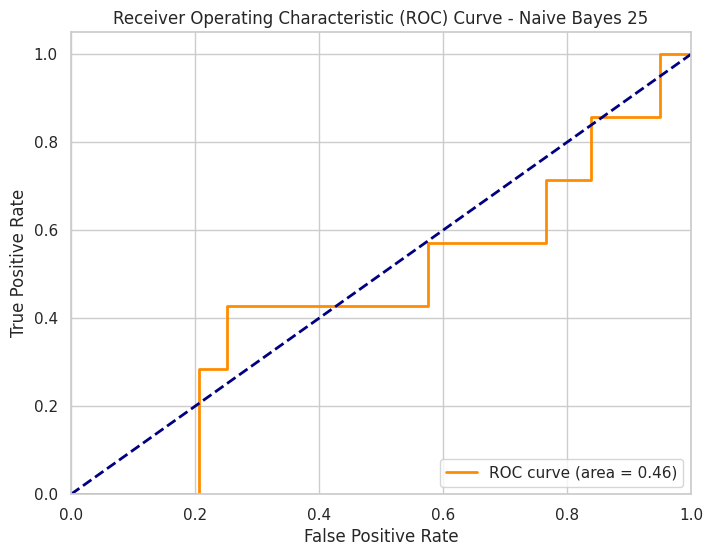

Execution time: 1.2953495979309082 seconds | Memory usage: 0.0 KB


(None, 1.2953495979309082, 0.0)

In [137]:
# @title Naive Bayes: 25% test data
from sklearn.naive_bayes import GaussianNB, MultinomialNB

nb_model_25 = GaussianNB()
nb_name_25 = "Naive Bayes 25"
run(df, nb_model_25, col_types, model_name=nb_name_25, test_size=0.25)

ROC AUC: 0.1226851851851852
Classification Report:Random Forest 15
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       144
           1       0.00      0.00      0.00         6

    accuracy                           0.96       150
   macro avg       0.48      0.50      0.49       150
weighted avg       0.92      0.96      0.94       150

Confusion Matrix:
[[144   0]
 [  6   0]]
Accuracy Score:
0.96





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


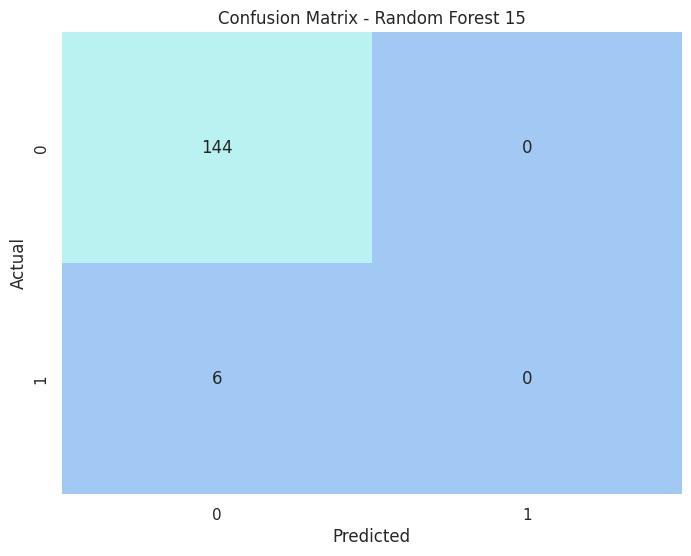

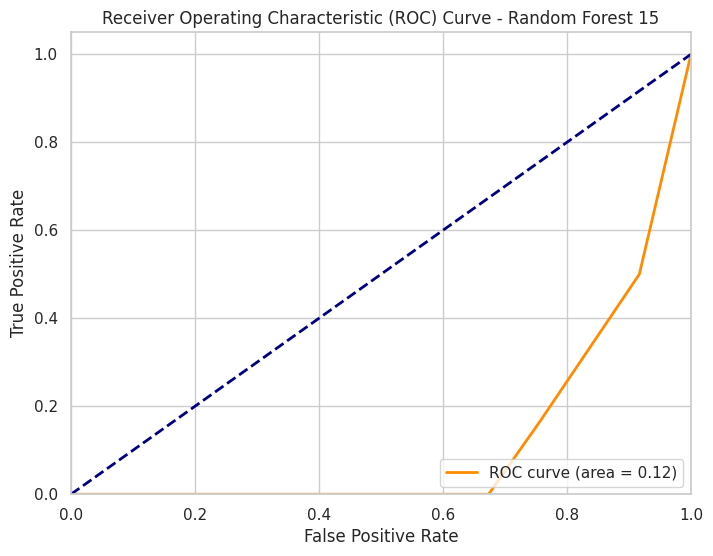

Execution time: 2.733139991760254 seconds | Memory usage: 0.0 KB


(None, 2.733139991760254, 0.0)

In [138]:
# @title Random Forest Classifier: 15% test data
from sklearn.ensemble import RandomForestClassifier

rf_model_15 = RandomForestClassifier(n_estimators=100, random_state=71)
rf_name_15 = "Random Forest 15"
run(df, rf_model_15, col_types, model_name=rf_name_15, test_size=0.15)

ROC AUC: 0.4329896907216495
Classification Report:Random Forest 20
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       194
           1       0.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.97      0.96       200

Confusion Matrix:
[[194   0]
 [  6   0]]
Accuracy Score:
0.97





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


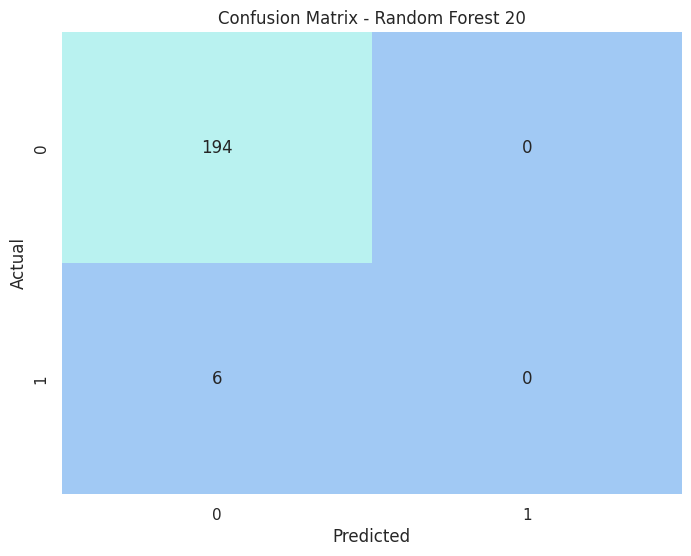

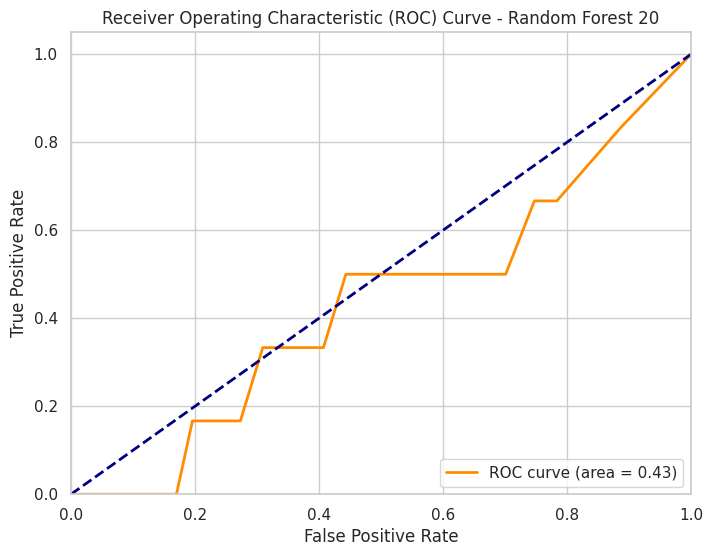

Execution time: 3.720447540283203 seconds | Memory usage: 0.0 KB


(None, 3.720447540283203, 0.0)

In [139]:
# @title Random Forest Classifier: 20% test data
from sklearn.ensemble import RandomForestClassifier

rf_model_20 = RandomForestClassifier(n_estimators=100, random_state=71)
rf_name_20 = "Random Forest 20"
run(df, rf_model_20, col_types, model_name=rf_name_20, test_size=0.20)

ROC AUC: 0.3868312757201646
Classification Report:Random Forest 25
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       243
           1       0.00      0.00      0.00         7

    accuracy                           0.97       250
   macro avg       0.49      0.50      0.49       250
weighted avg       0.94      0.97      0.96       250

Confusion Matrix:
[[243   0]
 [  7   0]]
Accuracy Score:
0.972





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


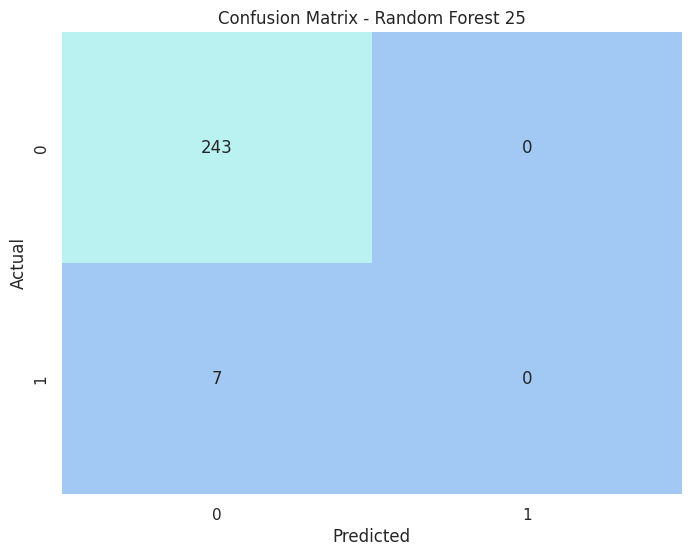

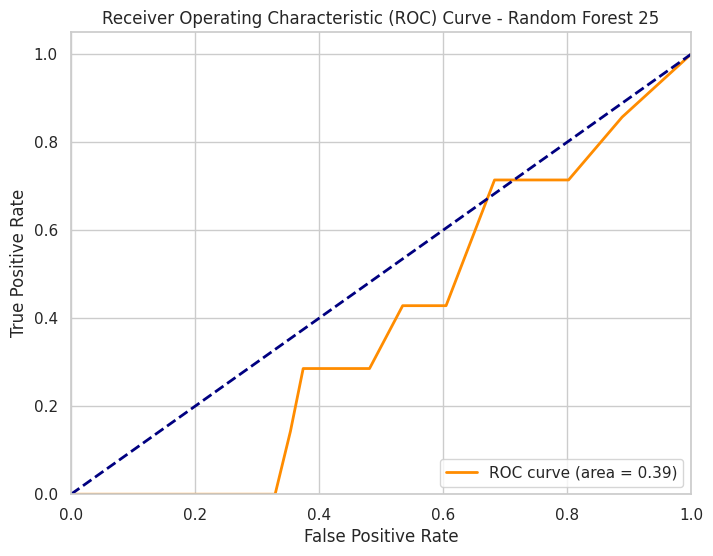

Execution time: 2.1000421047210693 seconds | Memory usage: 0.0 KB


(None, 2.1000421047210693, 0.0)

In [140]:
# @title Random Forest Classifier: 25% test data
from sklearn.ensemble import RandomForestClassifier

rf_model_25 = RandomForestClassifier(n_estimators=100, random_state=71)
rf_name_25 = "Random Forest 25"
run(df, rf_model_25, col_types, model_name=rf_name_25, test_size=0.25)

ROC AUC: 0.5767195767195767
Classification Report:Ada Boost 15
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       243
           1       0.33      0.14      0.20         7

    accuracy                           0.97       250
   macro avg       0.65      0.57      0.59       250
weighted avg       0.96      0.97      0.96       250

Confusion Matrix:
[[241   2]
 [  6   1]]
Accuracy Score:
0.968





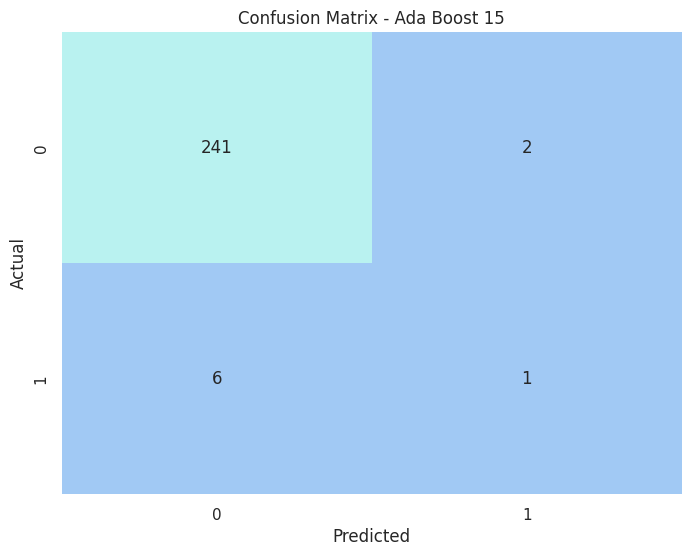

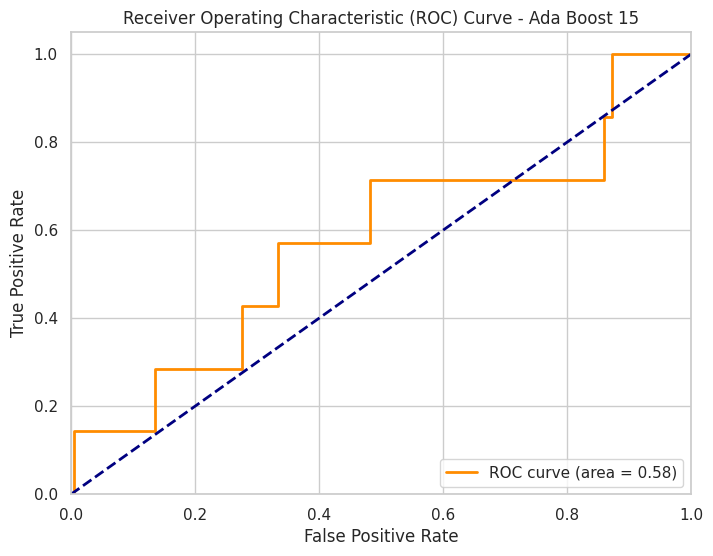

Execution time: 1.7263410091400146 seconds | Memory usage: 0.0 KB


(None, 1.7263410091400146, 0.0)

In [141]:
# @title Ada Boost Classifier: 15% Test Data
from sklearn.ensemble import AdaBoostClassifier

ada_model_15 = AdaBoostClassifier(n_estimators=50, random_state=71)
ada_name_15 = "Ada Boost 15"
run(df, ada_model_15, col_types, model_name=ada_name_15, test_size=0.25)

ROC AUC: 0.23539518900343642
Classification Report:Ada Boost 20
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       194
           1       0.00      0.00      0.00         6

    accuracy                           0.94       200
   macro avg       0.48      0.49      0.49       200
weighted avg       0.94      0.94      0.94       200

Confusion Matrix:
[[189   5]
 [  6   0]]
Accuracy Score:
0.945





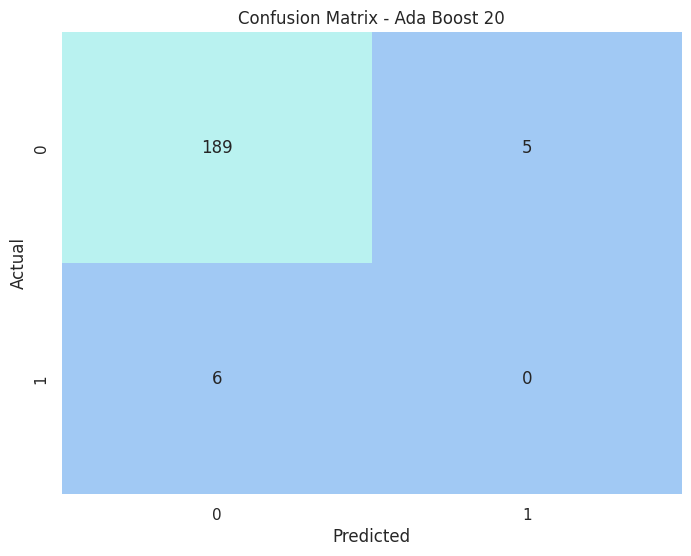

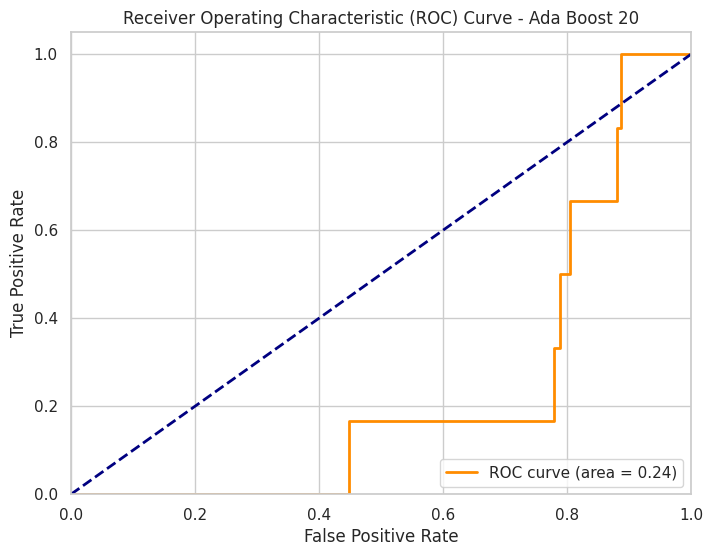

Execution time: 1.5179979801177979 seconds | Memory usage: 0.0 KB


(None, 1.5179979801177979, 0.0)

In [142]:
# @title Ada Boost Classifier: 20% Test Data
from sklearn.ensemble import AdaBoostClassifier

ada_model_20 = AdaBoostClassifier(n_estimators=50, random_state=71)
ada_name_20 = "Ada Boost 20"
run(df, ada_model_20, col_types, model_name=ada_name_20, test_size=0.20)

ROC AUC: 0.23539518900343642
Classification Report:Ada Boost 25
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       194
           1       0.00      0.00      0.00         6

    accuracy                           0.94       200
   macro avg       0.48      0.49      0.49       200
weighted avg       0.94      0.94      0.94       200

Confusion Matrix:
[[189   5]
 [  6   0]]
Accuracy Score:
0.945





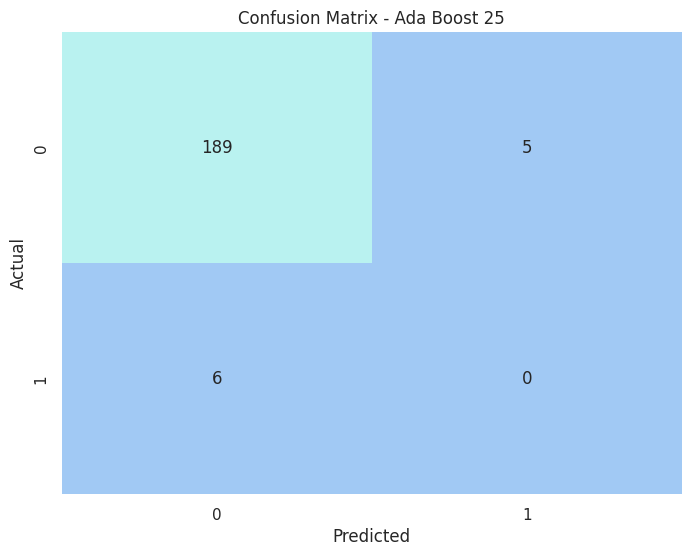

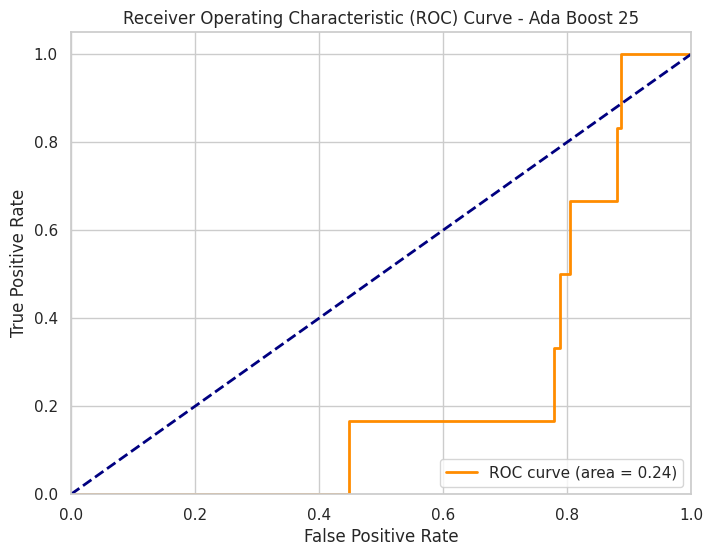

Execution time: 1.7085912227630615 seconds | Memory usage: 0.0 KB


(None, 1.7085912227630615, 0.0)

In [143]:
# @title Ada Boost Classifier: 25% Test Data
from sklearn.ensemble import AdaBoostClassifier

ada_model_25 = AdaBoostClassifier(n_estimators=50, random_state=71)
ada_name_25 = "Ada Boost 25"
run(df, ada_model_25, col_types, model_name=ada_name_25, test_size=0.20)

## Performance Evaluation
Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics. Comment on the performance of these models.

## Fine-Tuning Hyperparameters
You are required to explore the hyperparameter space for each classifier, utilizing techniques such as grid search or randomized search, to find the optimal combination of parameters that maximizes performance metrics.

## Performance Evaluation
After hyperparameter fine-tuning, evaluate the performance of each classifier using the following evaluation measures: Precision, Recall, F-score, Accuracy, Misclassification Rate

## Comparison and Analysis
Compare the performance of each classifier using the evaluation measures and provide a detailed analysis of the results. Recommend the ML model that, in your opinion, demonstrates the most favorable performance and justify your choice.

In [144]:
%unload_ext google.colab.data_table